<a href="https://colab.research.google.com/github/takumi-maker/bert/blob/main/static_arv_prototype_ver1_3_1ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import math
import statistics

In [3]:
df = pd.read_csv("債券複利データセット3.csv")
df

,Unnamed: 0,GJGC2,GJGC5,GJGC7,GJGC10,GJGC15,GJGC20,GJGC30,GJGC40
0,2021/1/12,-0.128,-0.114,-0.080,0.030,0.242,0.414,0.649,0.666
1,2021/1/13,-0.128,-0.119,-0.084,0.025,0.231,0.405,0.635,0.649
2,2021/1/14,-0.123,-0.104,-0.079,0.030,0.231,0.410,0.643,0.661
3,2021/1/15,-0.129,-0.104,-0.079,0.030,0.226,0.414,0.649,0.670
4,2021/1/18,-0.129,-0.098,-0.069,0.045,0.252,0.438,0.658,0.679
...,...,...,...,...,...,...,...,...,...
974,2025/1/6,0.625,0.780,0.863,1.114,1.561,1.898,2.268,2.554
975,2025/1/7,0.630,0.784,0.863,1.114,1.566,1.900,2.271,2.569
976,2025/1/8,0.645,0.808,0.902,1.176,1.595,1.934,2.288,2.588
977,2025/1/9,0.640,0.804,0.897,1.172,1.590,1.918,2.280,2.588


In [4]:
df_1 = pd.read_csv("債券複利データセット3.csv")
df_1 = df_1.drop(df_1.columns[0], axis=1)
columns_len = len(df_1.columns)
length = len(df_1)
df_1

,GJGC2,GJGC5,GJGC7,GJGC10,GJGC15,GJGC20,GJGC30,GJGC40
0,-0.128,-0.114,-0.080,0.030,0.242,0.414,0.649,0.666
1,-0.128,-0.119,-0.084,0.025,0.231,0.405,0.635,0.649
2,-0.123,-0.104,-0.079,0.030,0.231,0.410,0.643,0.661
3,-0.129,-0.104,-0.079,0.030,0.226,0.414,0.649,0.670
4,-0.129,-0.098,-0.069,0.045,0.252,0.438,0.658,0.679
...,...,...,...,...,...,...,...,...
974,0.625,0.780,0.863,1.114,1.561,1.898,2.268,2.554
975,0.630,0.784,0.863,1.114,1.566,1.900,2.271,2.569
976,0.645,0.808,0.902,1.176,1.595,1.934,2.288,2.588
977,0.640,0.804,0.897,1.172,1.590,1.918,2.280,2.588


In [5]:
df_list = df_1.to_numpy()
y_list = df_list[1,:]
y_list

array([-0.128, -0.119, -0.084,  0.025,  0.231,  0.405,  0.635,  0.649])

In [6]:
def create_dataset(T, list, columns_len):
  def log_return(y_t1,y_t2,columns_len):
    y_t = np.zeros(columns_len)
    #y_t_return = np.divide(y_t2,y_t1)
    #y_t[:] = np.log(y_t_return)
    y_t[:] = y_t2-y_t1

    return y_t

  y = np.zeros((T-1, columns_len))
  for t in range(1, T):
    y[t-1,:] = log_return(list[t-1,:],list[t,:],columns_len)

  return y

In [7]:
df_list = df_1.to_numpy()
y_log = create_dataset(length,df_list,columns_len)
print(y_log)

[[ 0.    -0.005 -0.004 ... -0.009 -0.014 -0.017]
 [ 0.005  0.015  0.005 ...  0.005  0.008  0.012]
 [-0.006  0.     0.    ...  0.004  0.006  0.009]
 ...
 [ 0.015  0.024  0.039 ...  0.034  0.017  0.019]
 [-0.005 -0.004 -0.005 ... -0.016 -0.008  0.   ]
 [ 0.005  0.015  0.024 ...  0.026  0.02   0.018]]


In [8]:
y_log_df = pd.DataFrame(y_log,columns=df_1.columns)
y_log_df

,GJGC2,GJGC5,GJGC7,GJGC10,GJGC15,GJGC20,GJGC30,GJGC40
0,0.000,-0.005,-0.004,-0.005,-0.011,-0.009,-0.014,-0.017
1,0.005,0.015,0.005,0.005,0.000,0.005,0.008,0.012
2,-0.006,0.000,0.000,0.000,-0.005,0.004,0.006,0.009
3,0.000,0.006,0.010,0.015,0.026,0.024,0.009,0.009
4,0.004,-0.010,-0.010,-0.005,0.005,0.005,0.000,-0.005
...,...,...,...,...,...,...,...,...
973,0.025,0.046,0.033,0.032,0.028,0.024,0.021,0.027
974,0.005,0.004,0.000,0.000,0.005,0.002,0.003,0.015
975,0.015,0.024,0.039,0.062,0.029,0.034,0.017,0.019
976,-0.005,-0.004,-0.005,-0.004,-0.005,-0.016,-0.008,0.000


In [9]:
y_log_df[940:965]

,GJGC2,GJGC5,GJGC7,GJGC10,GJGC15,GJGC20,GJGC30,GJGC40
940,0.005,0.007,0.011,0.017,0.018,0.017,0.020,0.034
941,0.021,0.015,0.018,0.011,0.003,-0.004,-0.003,0.000
942,0.000,-0.005,-0.001,0.001,0.005,0.009,0.003,0.004
943,0.000,0.006,-0.004,-0.006,-0.013,-0.005,-0.012,-0.011
944,0.000,0.004,0.000,0.000,0.000,-0.004,0.001,-0.008
945,0.026,0.034,0.029,0.030,0.017,0.014,-0.005,-0.011
946,0.011,-0.004,-0.010,-0.016,-0.012,-0.010,0.005,-0.004
947,0.000,-0.005,-0.014,-0.008,-0.008,-0.008,0.000,0.001
948,0.000,-0.006,-0.007,-0.010,-0.017,-0.013,-0.005,-0.005
949,0.005,0.007,0.012,0.009,0.017,0.021,0.021,0.034


In [27]:
#predict用
from sklearn.linear_model import LinearRegression
import statsmodels
import statsmodels.api
import matplotlib.pyplot as plt

term_flag = 7

magic_num = 90
total_num = 500
s_list = []
coef_list = []
total_list = []

for j in range(total_num):
  total_list.append(list(y_log[len(y_log)-1-j]))
print(len(total_list))

for i in range(magic_num-1,len(y_log)):
  #print("i:",i)
  if i <= len(y_log)-1-total_num:
    continue
  #print("i:",i)
  #print(y_log[len(y_log)-1])
  return_list = []

  for j in range(magic_num):
    return_list.append(list(y_log[i-j]))

  #print(return_list)
  for j in range(len(df_1.columns)):
    #if j != term_flag:
      #continue
    if j == 2:
      continue
    else:
      R_list1 = [r[j] for r in return_list]
      R_fut_list = [r[2] for r in return_list]
      R_list1 = np.array(R_list1).reshape(-1, 1)
      R_fut_list = np.array(R_fut_list).reshape(-1, 1)

      total_list1 = [r[j] for r in total_list]
      total_fut_list = [r[2] for r in total_list]
      total_list1 = np.array(total_list1).reshape(-1, 1)
      total_fut_list = np.array(total_fut_list).reshape(-1, 1)

      #print(R_list1)
      #print("return_1:",R_list1[0])
      #print("return_fut:",R_fut_list[0])
      #print(R_fut_list)
      lr = LinearRegression()
      lr.fit(R_fut_list, R_list1)
      #lr.fit(total_fut_list, total_list1)

      coefficient = lr.coef_[0,0]
      #print("cof",coefficient)
      coef_list.append(coefficient)
      intercept = lr.intercept_[0]
      #print(intercept)

      res_list = []
      for l in range(magic_num):
        residual = list(R_list1[l] - intercept - coefficient*R_fut_list[l])
        #residual = list(R_list1[l] - R_fut_list[l])
        res_list.append(residual)
      res_list = np.ravel(np.array(res_list))
      #print(res_list)
      X_list = []
      for l in range(len(res_list)):
        res_list_sub = res_list[l:len(res_list)]
        X_t = sum(res_list_sub)
        X_list.append(X_t)
      #print(X_list)
      X_list2 = list(reversed(X_list))
      #print(X_list2)
      ar_model = statsmodels.tsa.ar_model.AutoReg(X_list2,lags=1)
      ar_res = ar_model.fit()

      a = ar_res.params[0]
      #print(a)
      b = ar_res.params[1]
      #print(b)
      var = ar_res.sigma2
      #print(var)

      s = (X_list2[len(X_list2)-1]-a*np.sqrt(1-b**2))/((1-b)*np.sqrt(var))
      #s = (X_list2[len(X_list2)-1]-a*np.sqrt(1-b**2))
      #print("S_score:",s)
      s_list.append(s)

    if i == len(y_log)-1:
      print("i:",i)
      print("term_num:",j)
      print("cof",float(format(coefficient, '.1f')))
      print("s:",s)
      #print(return_list)

#plt.plot(s_list)
#plt.show()

500
i: 977
term_num: 0
cof 0.6
s: -0.7703337265178627
i: 977
term_num: 1
cof 0.8
s: -0.7884555912571514
i: 977
term_num: 3
cof 0.9
s: 0.5897342468037925
i: 977
term_num: 4
cof 0.8
s: -0.6297773565211139
i: 977
term_num: 5
cof 0.7
s: -0.5714979812471768
i: 977
term_num: 6
cof 0.4
s: -0.6688437410484104
i: 977
term_num: 7
cof 0.4
s: -0.7057325791289408


100
100


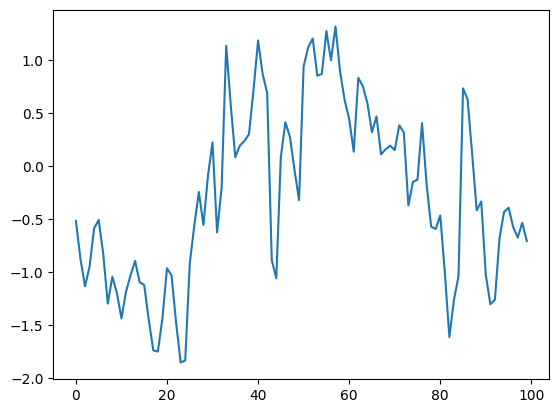

0.5161
0.5161
200
200


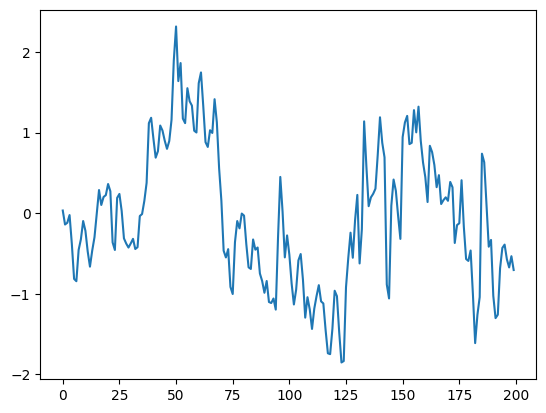

0.9272999999999997
0.9272999999999997
300
300


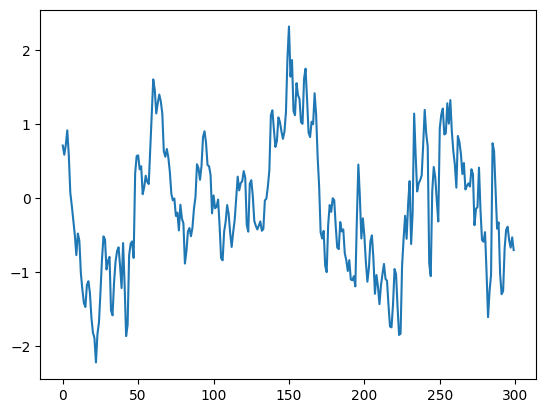

1.1206999999999994
1.1206999999999994
400
400


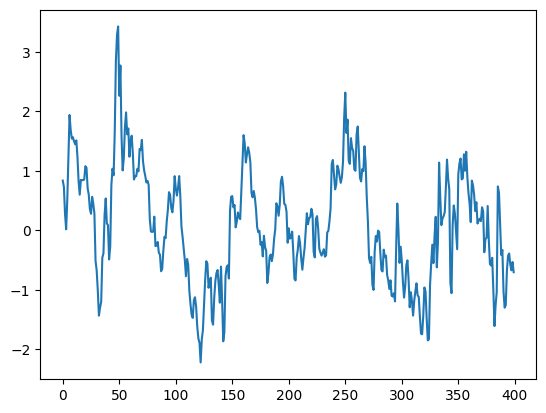

1.1182999999999994
1.1182999999999994
500
500


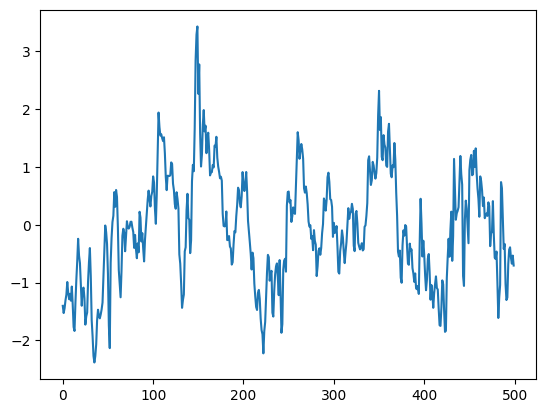

1.362699999999999
1.362699999999999
600
600


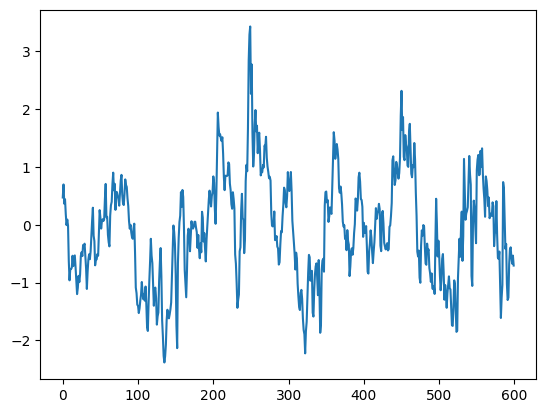

1.4880999999999995
1.4880999999999995
700
700


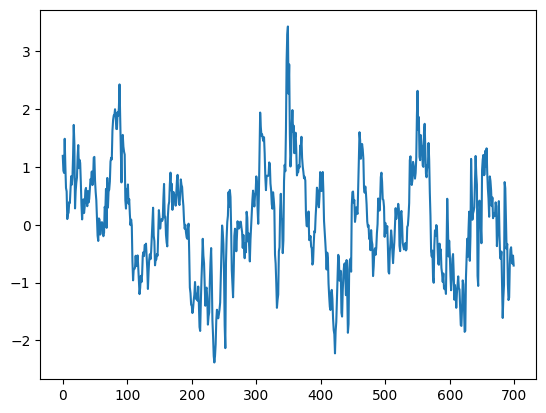

1.5108999999999992
1.5108999999999992


In [23]:
#3日ポジション保持バージョン
from sklearn.linear_model import LinearRegression
import statsmodels
import statsmodels.api
import matplotlib.pyplot as plt

term_flag = 7
magic_num = 90
for i in range(1,8):

  total_num = 100*i
  print(total_num)

  s_list = []
  coef_list = []
  total_list = []

  for j in range(total_num):
    total_list.append(list(y_log[len(y_log)-1-j]))
  print(len(total_list))

  for i in range(magic_num-1,len(y_log)):
    #print("i:",i)
    if i <= len(y_log)-1-total_num:
      continue
    #print("i:",i)
    #print(y_log[len(y_log)-1])
    return_list = []

    for j in range(magic_num):
      return_list.append(list(y_log[i-j]))

    #print(return_list)
    for j in range(len(df_1.columns)):
      if j != term_flag:
        continue
      if j == 2:
        continue
      else:
        R_list1 = [r[j] for r in return_list]
        R_fut_list = [r[2] for r in return_list]
        R_list1 = np.array(R_list1).reshape(-1, 1)
        R_fut_list = np.array(R_fut_list).reshape(-1, 1)

        total_list1 = [r[j] for r in total_list]
        total_fut_list = [r[2] for r in total_list]
        total_list1 = np.array(total_list1).reshape(-1, 1)
        total_fut_list = np.array(total_fut_list).reshape(-1, 1)

        #print(R_list1)
        #print("return_1:",R_list1[0])
        #print("return_fut:",R_fut_list[0])
        #print(R_fut_list)
        lr = LinearRegression()
        lr.fit(R_fut_list, R_list1)
        #lr.fit(total_fut_list, total_list1)

        coefficient = lr.coef_[0,0]
        #print("cof",coefficient)
        coef_list.append(coefficient)
        intercept = lr.intercept_[0]
        #print(intercept)

        res_list = []
        for l in range(magic_num):
          residual = list(R_list1[l] - intercept - coefficient*R_fut_list[l])
          #residual = list(R_list1[l] - R_fut_list[l])
          res_list.append(residual)
        res_list = np.ravel(np.array(res_list))
        #print(res_list)
        X_list = []
        for l in range(len(res_list)):
          res_list_sub = res_list[l:len(res_list)]
          X_t = sum(res_list_sub)
          X_list.append(X_t)
        #print(X_list)
        X_list2 = list(reversed(X_list))
        #print(X_list2)
        ar_model = statsmodels.tsa.ar_model.AutoReg(X_list2,lags=1)
        ar_res = ar_model.fit()

        a = ar_res.params[0]
        #print(a)
        b = ar_res.params[1]
        #print(b)
        var = ar_res.sigma2
        #print(var)

        s = (X_list2[len(X_list2)-1]-a*np.sqrt(1-b**2))/((1-b)*np.sqrt(var))
        #s = (X_list2[len(X_list2)-1]-a*np.sqrt(1-b**2))
        #print("S_score:",s)
        s_list.append(s)




  plt.plot(s_list)
  plt.show()

  r_list = []
  R_sum2 =0
  for i in range(len(s_list)-3):
    #print("i:",i+len(y_log)-total_num)
    s = s_list[i]
    coefficient= coef_list[i]
    coefficient_2= coef_list[i+1]
    coefficient_3= coef_list[i+2]
    coefficient= float(format(coefficient, '.1f'))
    return_ = 0
    return_2 = 0
    return_sum = 0
    if s>1.0 or s<-1.0:
      #print("i:",i+len(y_log)-total_num)
      #print("s:",s)
      #print("coef:",coefficient)
      if s>0:
        r1_flag = -1
        fut_flag = 1
      if s<0:
        r1_flag = 1
        fut_flag = -1
      t_i = i+len(y_log)-total_num
      r2_list = list(y_log[t_i+1])
      r2 = r2_list[term_flag]
      r_fut = r2_list[2]
      r3_list = list(y_log[t_i+2])
      r3 = r3_list[term_flag]
      r3_fut = r3_list[2]
      r4_list = list(y_log[t_i+3])
      r4 = r4_list[term_flag]
      r4_fut = r4_list[2]
      return_ = r2*r1_flag + r_fut*fut_flag*coefficient
      #return_ = r2*r1_flag + r_fut*fut_flag
      return_2 = r3*r1_flag + r3_fut*fut_flag*coefficient
      return_3 = r4*r1_flag + r4_fut*fut_flag*coefficient
      #return_2 = r3*r1_flag + r3_fut*fut_flag
      return_sum = return_ + return_2 +return_3-0.001
      #return_sum = return_  -0.001
      R_sum2 = R_sum2 + return_sum
      #return_ = r2*r1_flag + r_fut*fut_flag
      if -100 < return_<100 :
        r_list.append(return_sum)
        #print(r2_list)
        #print(r2)
        #print(r_fut)
        #print(r3_list)
        #print(r3)
        #print(r3_fut)
        #print("b_1",coefficient_2)
        #print("b_2",coefficient_3)
        #print(return_)
      #while t_i+1 < len(s_list)-1:
        #r2_list = list(y_log[t_i])
        #r2 = r2_list[j]
  R_sum = sum(r_list)
  print(R_sum)
  print(R_sum2)

100
100


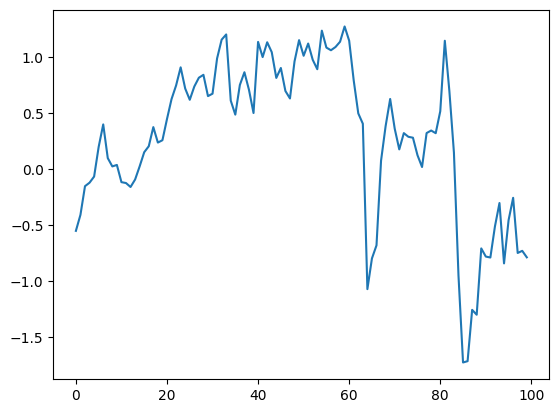

0.03549999999999991
0.03549999999999991
200
200


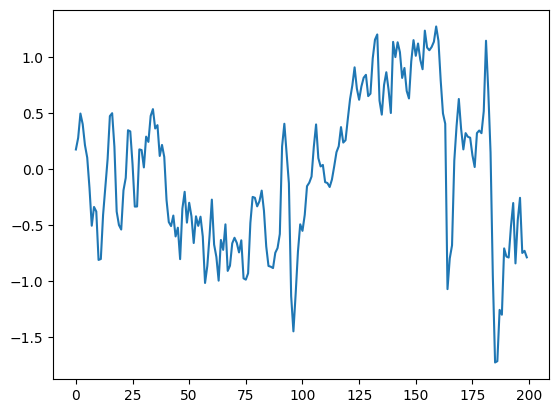

0.11589999999999989
0.11589999999999989
300
300


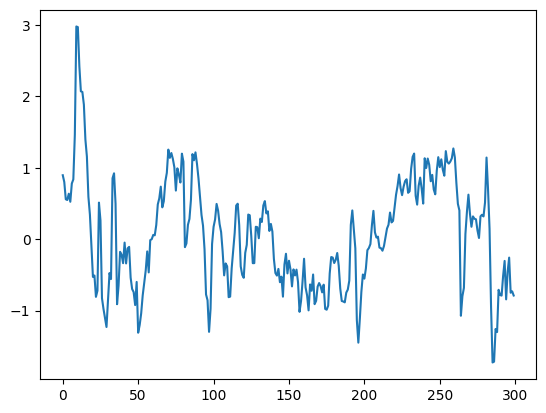

0.07819999999999985
0.07819999999999985
400
400


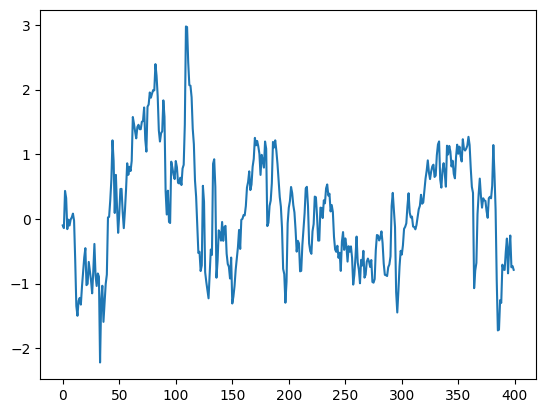

0.10889999999999975
0.10889999999999975
500
500


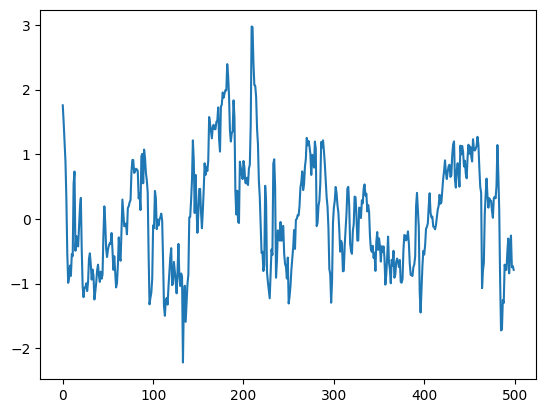

0.1657999999999997
0.1657999999999997
600
600


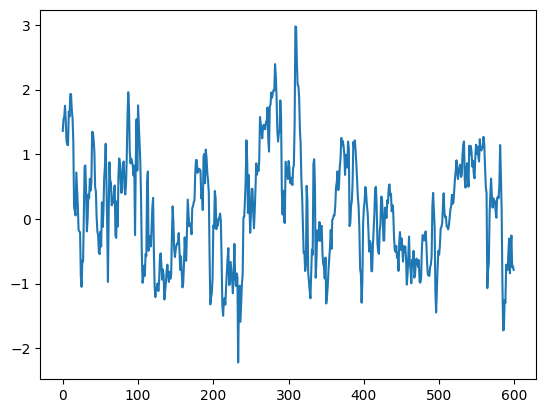

0.23479999999999976
0.23479999999999976
700
700


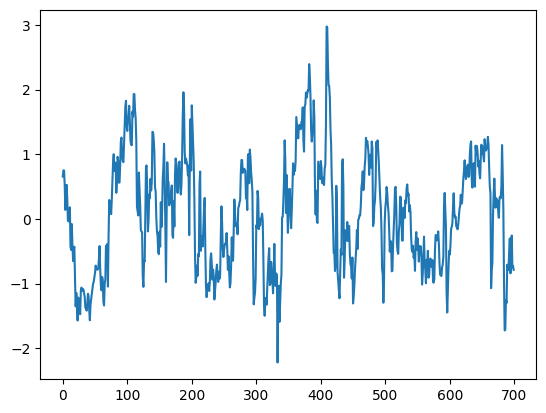

0.24339999999999976
0.24339999999999976


In [18]:
from sklearn.linear_model import LinearRegression
import statsmodels
import statsmodels.api
import matplotlib.pyplot as plt

term_flag = 1
magic_num = 90
for i in range(1,8):

  total_num = 100*i
  print(total_num)

  s_list = []
  coef_list = []
  total_list = []

  for j in range(total_num):
    total_list.append(list(y_log[len(y_log)-1-j]))
  print(len(total_list))

  for i in range(magic_num-1,len(y_log)):
    #print("i:",i)
    if i <= len(y_log)-1-total_num:
      continue
    #print("i:",i)
    #print(y_log[len(y_log)-1])
    return_list = []

    for j in range(magic_num):
      return_list.append(list(y_log[i-j]))

    #print(return_list)
    for j in range(len(df_1.columns)):
      if j != term_flag:
        continue
      if j == 2:
        continue
      else:
        R_list1 = [r[j] for r in return_list]
        R_fut_list = [r[2] for r in return_list]
        R_list1 = np.array(R_list1).reshape(-1, 1)
        R_fut_list = np.array(R_fut_list).reshape(-1, 1)

        total_list1 = [r[j] for r in total_list]
        total_fut_list = [r[2] for r in total_list]
        total_list1 = np.array(total_list1).reshape(-1, 1)
        total_fut_list = np.array(total_fut_list).reshape(-1, 1)

        #print(R_list1)
        #print("return_1:",R_list1[0])
        #print("return_fut:",R_fut_list[0])
        #print(R_fut_list)
        lr = LinearRegression()
        lr.fit(R_fut_list, R_list1)
        #lr.fit(total_fut_list, total_list1)

        coefficient = lr.coef_[0,0]
        #print("cof",coefficient)
        coef_list.append(coefficient)
        intercept = lr.intercept_[0]
        #print(intercept)

        res_list = []
        for l in range(magic_num):
          residual = list(R_list1[l] - intercept - coefficient*R_fut_list[l])
          #residual = list(R_list1[l] - R_fut_list[l])
          res_list.append(residual)
        res_list = np.ravel(np.array(res_list))
        #print(res_list)
        X_list = []
        for l in range(len(res_list)):
          res_list_sub = res_list[l:len(res_list)]
          X_t = sum(res_list_sub)
          X_list.append(X_t)
        #print(X_list)
        X_list2 = list(reversed(X_list))
        #print(X_list2)
        ar_model = statsmodels.tsa.ar_model.AutoReg(X_list2,lags=1)
        ar_res = ar_model.fit()

        a = ar_res.params[0]
        #print(a)
        b = ar_res.params[1]
        #print(b)
        var = ar_res.sigma2
        #print(var)

        s = (X_list2[len(X_list2)-1]-a*np.sqrt(1-b**2))/((1-b)*np.sqrt(var))
        #s = (X_list2[len(X_list2)-1]-a*np.sqrt(1-b**2))
        #print("S_score:",s)
        s_list.append(s)




  plt.plot(s_list)
  plt.show()

  r_list = []
  R_sum2 =0
  for i in range(len(s_list)-2):
    #print("i:",i+len(y_log)-total_num)
    s = s_list[i]
    coefficient= coef_list[i]
    coefficient_2= coef_list[i+1]
    coefficient_3= coef_list[i+2]
    coefficient= float(format(coefficient, '.1f'))
    return_ = 0
    return_2 = 0
    return_sum = 0
    if s>1.0 or s<-1.0:
      #print("i:",i+len(y_log)-total_num)
      #print("s:",s)
      #print("coef:",coefficient)
      if s>0:
        r1_flag = -1
        fut_flag = 1
      if s<0:
        r1_flag = 1
        fut_flag = -1
      t_i = i+len(y_log)-total_num
      r2_list = list(y_log[t_i+1])
      r2 = r2_list[term_flag]
      r_fut = r2_list[2]
      r3_list = list(y_log[t_i+2])
      r3 = r3_list[term_flag]
      r3_fut = r3_list[2]
      return_ = r2*r1_flag + r_fut*fut_flag*coefficient
      #return_ = r2*r1_flag + r_fut*fut_flag
      return_2 = r3*r1_flag + r3_fut*fut_flag*coefficient
      #return_2 = r3*r1_flag + r3_fut*fut_flag
      return_sum = return_ + return_2 -0.001
      #return_sum = return_  -0.001
      R_sum2 = R_sum2 + return_sum
      #return_ = r2*r1_flag + r_fut*fut_flag
      if -100 < return_<100 :
        r_list.append(return_sum)
        #print(r2_list)
        #print(r2)
        #print(r_fut)
        #print(r3_list)
        #print(r3)
        #print(r3_fut)
        #print("b_1",coefficient_2)
        #print("b_2",coefficient_3)
        #print(return_)
      #while t_i+1 < len(s_list)-1:
        #r2_list = list(y_log[t_i])
        #r2 = r2_list[j]
  R_sum = sum(r_list)
  print(R_sum)
  print(R_sum2)

500


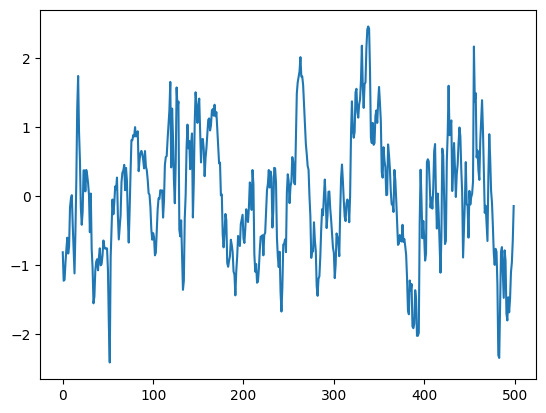

In [ ]:
from sklearn.linear_model import LinearRegression
import statsmodels
import statsmodels.api
import matplotlib.pyplot as plt

term_flag = 7

magic_num = 60
total_num = 500
s_list = []
coef_list = []
total_list = []

for j in range(total_num):
  total_list.append(list(y_log[len(y_log)-1-j]))
print(len(total_list))

for i in range(magic_num-1,len(y_log)):
  #print("i:",i)
  if i <= len(y_log)-1-total_num:
    continue
  #print("i:",i)
  #print(y_log[len(y_log)-1])
  return_list = []

  for j in range(magic_num):
    return_list.append(list(y_log[i-j]))

  #print(return_list)
  for j in range(len(df_1.columns)):
    if j != term_flag:
      continue
    if j == 2:
      continue
    else:
      R_list1 = [r[j] for r in return_list]
      R_fut_list = [r[2] for r in return_list]
      R_list1 = np.array(R_list1).reshape(-1, 1)
      R_fut_list = np.array(R_fut_list).reshape(-1, 1)

      total_list1 = [r[j] for r in total_list]
      total_fut_list = [r[2] for r in total_list]
      total_list1 = np.array(total_list1).reshape(-1, 1)
      total_fut_list = np.array(total_fut_list).reshape(-1, 1)

      #print(R_list1)
      #print("return_1:",R_list1[0])
      #print("return_fut:",R_fut_list[0])
      #print(R_fut_list)
      lr = LinearRegression()
      lr.fit(R_fut_list, R_list1)
      #lr.fit(total_fut_list, total_list1)

      coefficient = lr.coef_[0,0]
      #print("cof",coefficient)
      coef_list.append(coefficient)
      intercept = lr.intercept_[0]
      #print(intercept)

      res_list = []
      for l in range(magic_num):
        residual = list(R_list1[l] - intercept - coefficient*R_fut_list[l])
        #residual = list(R_list1[l] - R_fut_list[l])
        res_list.append(residual)
      res_list = np.ravel(np.array(res_list))
      #print(res_list)
      X_list = []
      for l in range(len(res_list)):
        res_list_sub = res_list[l:len(res_list)]
        X_t = sum(res_list_sub)
        X_list.append(X_t)
      #print(X_list)
      X_list2 = list(reversed(X_list))
      #print(X_list2)
      ar_model = statsmodels.tsa.ar_model.AutoReg(X_list2,lags=1)
      ar_res = ar_model.fit()

      a = ar_res.params[0]
      #print(a)
      b = ar_res.params[1]
      #print(b)
      var = ar_res.sigma2
      #print(var)

      s = (X_list2[len(X_list2)-1]-a*np.sqrt(1-b**2))/((1-b)*np.sqrt(var))
      #s = (X_list2[len(X_list2)-1]-a*np.sqrt(1-b**2))
      #print("S_score:",s)
      s_list.append(s)




plt.plot(s_list)
plt.show()

In [ ]:

r_list = []
for i in range(len(s_list)-2):
  #print("i:",i+len(y_log)-total_num)
  s = s_list[i]
  coefficient= coef_list[i]
  coefficient_2= coef_list[i+1]
  coefficient_3= coef_list[i+2]
  coefficient= float(format(coefficient, '.1f'))
  if s>1.0 or s<-1.0:
    print("i:",i+len(y_log)-total_num)
    print("s:",s)
    print("coef:",coefficient)
    if s>0:
      r1_flag = -1
      fut_flag = 1
    if s<0:
      r1_flag = 1
      fut_flag = -1
    t_i = i+len(y_log)-total_num
    r2_list = list(y_log[t_i+1])
    r2 = r2_list[term_flag]
    r_fut = r2_list[2]
    r3_list = list(y_log[t_i+2])
    r3 = r3_list[term_flag]
    r3_fut = r3_list[2]
    return_ = r2*r1_flag + r_fut*fut_flag*coefficient
    #return_ = r2*r1_flag + r_fut*fut_flag
    return_2 = r3*r1_flag + r3_fut*fut_flag*coefficient
    #return_2 = r3*r1_flag + r3_fut*fut_flag
    return_ = return_ + return_2
    #return_ = r2*r1_flag + r_fut*fut_flag
    if -3 < return_<3 :
      r_list.append(return_)
      #print(r2_list)
      #print(r2)
      #print(r_fut)
      #print(r3_list)
      #print(r3)
      #print(r3_fut)
      print("b_1",coefficient_2)
      print("b_2",coefficient_3)
      print(return_)
    #while t_i+1 < len(s_list)-1:
      #r2_list = list(y_log[t_i])
      #r2 = r2_list[j]
R_sum = sum(r_list)
print(R_sum)

i: 479
s: -1.2237457774374714
coef: 0.5
b_1 0.5372512567656554
b_2 0.5139073552092748
0.05949999999999994
i: 480
s: -1.2109935903821412
coef: 0.5
b_1 0.5139073552092748
b_2 0.5140544965992107
0.05650000000000005
i: 491
s: -1.117531996491276
coef: 0.5
b_1 0.44175406135979206
b_2 0.39480530480869314
0.09099999999999991
i: 494
s: 1.2838137287596496
coef: 0.4
b_1 0.3356162416527749
b_2 0.3155223218126179
0.004400000000000001
i: 495
s: 1.7455473751162571
coef: 0.3
b_1 0.3155223218126179
b_2 0.3056670141928248
0.041299999999999906
i: 511
s: -1.0410858247877153
coef: 0.2
b_1 0.19471531222661534
b_2 0.19241038498136745
-0.03420000000000003
i: 512
s: -1.5509719474022279
coef: 0.2
b_1 0.19241038498136745
b_2 0.19569740075675846
-0.004999999999999994
i: 513
s: -1.4512382380087356
coef: 0.2
b_1 0.19569740075675846
b_2 0.19598594130599267
0.0022000000000000127
i: 514
s: -1.0769453869093193
coef: 0.2
b_1 0.19598594130599267
b_2 0.19494041088995218
-0.007999999999999896
i: 517
s: -1.0720420622139049


In [ ]:
class Trader():
    def __init__(self, num_stock, num_factors_max, delay_time_max, activation_funcs, binary_operators, time_window=None):
        # set hyperparameters
        self.num_stock = num_stock
        self.num_factors_max = num_factors_max
        self.delay_time_max = delay_time_max
        self.activation_funcs = activation_funcs
        self.binary_operators = binary_operators
        # if time_window==None, train by using all data
        self.time_window = time_window

        # GMMのための辞書
        self.dict_activation = dict(zip(activation_funcs, range(len(activation_funcs))))
        self.dict_binary = dict(zip(binary_operators, range(len(binary_operators))))

        # initialize by stock
        self.num_factors = [np.nan for _ in range(num_stock)]
        self.delay_P = [np.nan for _ in range(num_stock)]
        self.delay_Q = [np.nan for _ in range(num_stock)]
        self.stock_P = [np.nan for _ in range(num_stock)]
        self.stock_Q = [np.nan for _ in range(num_stock)]
        self.activation_func = [np.nan for _ in range(num_stock)]
        self.binary_operator = [np.nan for _ in range(num_stock)]
        self.w = [np.nan for _ in range(num_stock)]

        self.X_factors = [[] for _ in range(num_stock)]
        self.cumulative_error = [np.nan for _ in range(num_stock)]

        # initialized by uniform distribution
        for i_stock in range(num_stock):
            self.num_factors[i_stock] = np.random.choice(range(1, self.num_factors_max+1))
            self.delay_P[i_stock] = np.random.choice(delay_time_max, self.num_factors[i_stock])
            self.delay_Q[i_stock] = np.random.choice(delay_time_max, self.num_factors[i_stock])
            self.stock_P[i_stock] = np.random.choice(num_stock, self.num_factors[i_stock])
            self.stock_Q[i_stock] = np.random.choice(num_stock, self.num_factors[i_stock])
            self.activation_func[i_stock] = np.random.choice(activation_funcs, self.num_factors[i_stock])
            self.binary_operator[i_stock] = np.random.choice(binary_operators, self.num_factors[i_stock])
            self.w[i_stock] = np.random.randn(self.num_factors[i_stock])

            self.X_factors[i_stock] = np.zeros((0, self.num_factors[i_stock]))
            self.cumulative_error[i_stock] = 0.0

    def set_params(self, i_stock, list_params):
        self.num_factors[i_stock] = list_params[0]["num_factor"]

        self.delay_P[i_stock] = [list_params[factor+1]["delay_P"] for factor in range(self.num_factors[i_stock])]
        self.delay_Q[i_stock] = [list_params[factor+1]["delay_Q"] for factor in range(self.num_factors[i_stock])]
        self.stock_P[i_stock] = [list_params[factor+1]["stock_P"] for factor in range(self.num_factors[i_stock])]
        self.stock_Q[i_stock] = [list_params[factor+1]["stock_Q"] for factor in range(self.num_factors[i_stock])]
        self.activation_func[i_stock] = [self.activation_funcs[list_params[factor+1]["activation_func"]] for factor in range(self.num_factors[i_stock])]
        self.binary_operator[i_stock] = [self.binary_operators[list_params[factor+1]["binary_operator"]] for factor in range(self.num_factors[i_stock])]

        self.w[i_stock] = np.random.randn(self.num_factors[i_stock])

        self.X_factors[i_stock] = np.zeros((0, self.num_factors[i_stock]))
        self.cumulative_error[i_stock] = 0.0

    def get_params(self, i_stock):
        list_params = []
        num_factor = self.num_factors[i_stock]
        list_params.append({"num_factor": num_factor})

        for factor in range(num_factor):
            dict_ = {}
            dict_["delay_P"] = self.delay_P[i_stock][factor]
            dict_["delay_Q"] = self.delay_Q[i_stock][factor]
            dict_["stock_P"] = self.stock_P[i_stock][factor]
            dict_["stock_Q"] = self.stock_Q[i_stock][factor]
            dict_["activation_func"] = self.dict_activation[self.activation_func[i_stock][factor]]
            dict_["binary_operator"] = self.dict_binary[self.binary_operator[i_stock][factor]]

            list_params.append(dict_)

        return list_params

    def reset_params(self, i_stock):
        # initialized by uniform distribution
        self.num_factors[i_stock] = np.random.choice(range(1, self.num_factors_max+1))
        self.delay_P[i_stock] = np.random.choice(self.delay_time_max, self.num_factors[i_stock])
        self.delay_Q[i_stock] = np.random.choice(self.delay_time_max, self.num_factors[i_stock])
        self.stock_P[i_stock] = np.random.choice(self.num_stock, self.num_factors[i_stock])
        self.stock_Q[i_stock] = np.random.choice(self.num_stock, self.num_factors[i_stock])
        self.activation_func[i_stock] = np.random.choice(self.activation_funcs, self.num_factors[i_stock])
        self.binary_operator[i_stock] = np.random.choice(self.binary_operators, self.num_factors[i_stock])
        self.w[i_stock] = np.random.randn(self.num_factors[i_stock])

        self.X_factors[i_stock] = np.zeros((0, self.num_factors[i_stock]))
        self.cumulative_error[i_stock] = 0.0

    def calc_factor(self, data, i_stock, j):
        """ i_stock番目の株に関してj番目の項を計算
        """
        Aj = self.activation_func[i_stock][j]
        Oj = self.binary_operator[i_stock][j]
        Pj = self.stock_P[i_stock][j]
        Qj = self.stock_Q[i_stock][j]
        Dj = self.delay_P[i_stock][j]
        Fj = self.delay_Q[i_stock][j]
        try:
          a = Aj(Oj(data[Pj][self.delay_time_max-Dj], data[Qj][self.delay_time_max-Fj]))
        except:
          print(self.delay_time_max-Dj)
          print(self.delay_time_max-Fj)
          print(data)

        return Aj(Oj(data[Pj][self.delay_time_max-Dj], data[Qj][self.delay_time_max-Fj]))

    def calc_factors(self, data, i_stock):
        num_factors = self.num_factors[i_stock]
        factors = np.zeros(num_factors)
        for j in range(num_factors): # 各ファクターごとに
            factors[j] = self.calc_factor(data, i_stock, j)
        return factors

    def stack_factors(self, data, i_stock):
        """
        time_windowの数だけ計算した項(factors)をX_factorsに保存する
        time_windowを超えた場合、古いfactorsを削除し、最新のfactorsを一番下に保存する
        """
        factors = self.calc_factors(data, i_stock)
        if self.time_window is None:
            self.X_factors[i_stock] = np.vstack([self.X_factors[i_stock], factors])
        elif len(self.X_factors[i_stock]) < self.time_window:
            self.X_factors[i_stock] = np.vstack([self.X_factors[i_stock], factors])
        else:
            #
            self.X_factors[i_stock] = np.roll(self.X_factors[i_stock], -1, axis = 0)
            self.X_factors[i_stock][-1] = factors
        return None

    def learn(self, y, i_stock):
        epsilon = 0.0001
        X = self.X_factors[i_stock]
        if self._check_rank_deficient(i_stock):
            self.w[i_stock] = np.zeros(len(self.w[i_stock]))
        else:
            self.w[i_stock] = np.linalg.inv(X.T.dot(X) + epsilon).dot(X.T).dot(y)

    def _check_rank_deficient(self, i_stock):
        """ ランク落ちを確認
        """
        X = self.X_factors[i_stock]
        return np.linalg.matrix_rank(X.T.dot(X)) < self.num_factors[i_stock]

    def predict(self): # test dataに対するprediction, これに基づいてモデルの評価を行う．
        """ 最新のfactorsを使用して次の時刻の予測を行う
        """
        y_pred = np.zeros(self.num_stock)
        for i_stock in range(self.num_stock):
            y_pred[i_stock] = self.X_factors[i_stock][-1].dot(self.w[i_stock])
        return y_pred

    def predict_for_X_factors(self):
        """ len(X_factors) < time_windowの時エラー
        """
        y_preds = np.zeros((self.num_stock, self.time_window))
        for i_stock in range(self.num_stock):
            y_preds[i_stock] = self.X_factors[i_stock].dot(self.w[i_stock])
        return y_preds

    def calc_cumulative_error(self, y_true):
        y_preds = self.predict_for_X_factors()
        errors = (y_preds - y_true)**2.0
        errors = np.sqrt(errors.mean(1))
        for i_stock in range(self.num_stock):
            self.cumulative_error[i_stock] = errors[i_stock]
        return self.cumulative_error

In [ ]:
import numpy as np
import pandas as pd

from tqdm import tqdm
from sklearn import preprocessing, mixture
class Company:
    def __init__(self, stock_names, num_factors_max, delay_time_max, activation_funcs, binary_operators, num_traders, Q=0.2, time_window=None, how_recruit="random"):
        """ time_window shold be larger than num_factors_max
            1-Qがbad_tradersの割合を表す，つまりQが大きいほど解雇される割合が少なくなる．Qは生存率ともいえる．
            とりあえず全員をbad_traderにしてみた，意味はない
        """
        self.stock_names = stock_names
        self.num_stock = len(stock_names)
        self.num_factors_max = num_factors_max
        self.delay_time_max = delay_time_max
        self.activation_funcs = activation_funcs
        self.binary_operators = binary_operators
        self.num_traders = num_traders
        self.Q = Q
        # if time_window==None, train by using all data
        self.time_window = time_window
        self.how_recruit = how_recruit

        self.df_y_train = None

        self.initialize_traders()

    def fit(self, df_y_train):
        if self.df_y_train is not None:
            raise Exception("Error")
        self.df_y_train = df_y_train
        y_train = self.df_y_train.T.values

        for t in tqdm(range(self.delay_time_max+1, len(self.df_y_train))):
            data_to_stack = y_train[:, t-self.delay_time_max-1:t]
            self.observe(data_to_stack)

            if self.delay_time_max + 1 + self.time_window < t <= len(self.df_y_train):
                y_true = y_train[:, t-self.time_window+1:t+1]
                self.educate(y_true)
                self.fire_and_recruit(t, y_true)

        # 最後の時刻tのデータはeducateするためのt+1のデータがないためstockだけする
        # stockしないとself.aggregate()で予測する時にt-1までのデータで時刻tを予測することになる
        data_to_stack = y_train[:, t-self.delay_time_max:t+1]
        self.observe(data_to_stack)

    def fit_new_data(self, dict_y, tuning=False):
        # 最初にdf_y_trainにデータを追加。この時点では計算されていない。
        self.add_new_data(dict_y)

        # tuning=Trueであれば、新しいデータを使用して再度educate&fire_recruitを実施する
        if tuning:
            self.educate_fire_recruit_by_new_data()

        # 新しいデータを用いてfactorを計算する
        self.observe_new_data()

    def add_new_data(self, dict_y):
        df_y_train = self.df_y_train.append(dict_y, ignore_index=True)

    def educate_fire_recruit_by_new_data(self):
        # 一番最新のデータから教育
        t = len(df_y_train)
        y_train = df_y_train.T.values
        y_true = y_train[:, t-self.time_window:t]
        self.educate(y_true)
        self.fire_and_recruit(t-1, y_true)

    def observe_new_data(self):
        # 一番最新のデータをobserve
        t = len(df_y_train)
        y_train = df_y_train.T.values
        data_to_stack = y_train[:, t-self.delay_time_max-1:t]
        self.observe(data_to_stack)

    def initialize_traders(self):
        self.traders = [[] for _ in range(self.num_traders)]
        for i_trader in range(self.num_traders):
            self.traders[i_trader] = Trader(self.num_stock, self.num_factors_max, self.delay_time_max, self.activation_funcs, self.binary_operators, self.time_window)

    def generate_trader_without_singular_initialize_params(self, i_trader, i_stock, t, y_train):
        #y_train = df_y_train.T.values
        for i_stock in range(self.num_stock):
            self.traders[i_trader].reset_params(i_stock)
            for idx in reversed(range(self.time_window)):
                self.traders[i_trader].stack_factors(y_train[:,t-self.delay_time_max-1-idx:t-idx], i_stock)
            while self.traders[i_trader]._check_rank_deficient(i_stock):
                self.traders[i_trader].reset_params(i_stock)
                for idx in reversed(range(self.time_window)):
                    self.traders[i_trader].stack_factors(y_train[:,t-self.delay_time_max-1-idx:t-idx], i_stock)

    def generate_trader_without_singular(self, i_trader, i_stock, t, vbgmm_num_factor, vbgmm_factor_params, y_train):
        #y_train = df_y_train.T.values
        for i_stock in range(self.num_stock):
            list_params = self.sample_params(vbgmm_num_factor, vbgmm_factor_params)
            self.traders[i_trader].set_params(i_stock, list_params)
            for idx in reversed(range(self.time_window)):
                self.traders[i_trader].stack_factors(y_train[:,t-self.delay_time_max-1-idx:t-idx], i_stock)
            while self.traders[i_trader]._check_rank_deficient(i_stock):
                list_params = self.sample_params(vbgmm_num_factor, vbgmm_factor_params)
                self.traders[i_trader].set_params(i_stock, list_params)
                for idx in reversed(range(self.time_window)):
                    self.traders[i_trader].stack_factors(y_train[:,t-self.delay_time_max-1-idx:t-idx], i_stock)

    def observe(self, data):
        """ 全てのTraderのfactorsを計算して保存
        """
        for i_trader in range(self.num_traders):
            for i_stock in range(self.num_stock):
                self.traders[i_trader].stack_factors(data, i_stock)

    def educate(self, y_true):
        """ 下位Q%よりエラー率が悪いトレーダーが教育される
        """
        bad_traders = self.find_bad_traders(y_true, 1-self.Q)
        for i_trader in range(self.num_traders):
            for i_stock in range(self.num_stock):
                if bad_traders[i_stock][i_trader]:
                    self.traders[i_trader].learn(y_true[i_stock], i_stock)

    def find_bad_traders(self, y_true, Q):
        """ 上位Q%よりエラー率が悪いトレーダーを見つける
        """
        cumulative_errors = np.zeros((self.num_stock, self.num_traders))
        for i_trader in range(self.num_traders):
            for i_stock in range(self.num_stock):
                self.traders[i_trader].calc_cumulative_error(y_true)
                cumulative_errors[i_stock][i_trader] = self.traders[i_trader].cumulative_error[i_stock]

        bad_traders = np.ones((self.num_stock, self.num_traders)) > 0.0
        for i_stock in range(self.num_stock):
            bad_traders[i_stock] = cumulative_errors[i_stock] > np.percentile(cumulative_errors[i_stock], 100.*Q)
        return bad_traders

    def fire_and_recruit(self, t, y_true,y_df):
        """ 上位Q%よりエラー率が悪いトレーダーを解雇、補充する
        """
        if self.how_recruit == "gmm":
            list_vbgmm = []
            good_traders = ~self.find_bad_traders(y_true, 1-self.Q)
            for i_stock in range(self.num_stock):
                list_vbgmm.append(self.fit_vbgmm(i_stock, good_traders))

        bad_traders = self.find_bad_traders(y_true, self.Q)
        for i_trader in range(self.num_traders):
            for i_stock in range(self.num_stock):
                if bad_traders[i_stock][i_trader]:
                    if self.how_recruit == "gmm":
                        self.generate_trader_without_singular(i_trader, i_stock, t, list_vbgmm[i_stock][0], list_vbgmm[i_stock][1], y_df)
                    else:
                        self.generate_trader_without_singular_initialize_params(i_trader, i_stock, t, y_df)
                    self.traders[i_trader].calc_cumulative_error(y_true)

    def sample_params(self, vbgmm_num_factor, vbgmm_factor_params):
        list_params = []
        num_factor = np.vectorize(round)(vbgmm_num_factor.sample(1)[0][0])[0]
        num_factor = self.check_param(num_factor, 1, self.num_factors_max)
        list_params.append({"num_factor": num_factor})
        for i_factor in range(num_factor):
            factor_params = np.vectorize(round)(vbgmm_factor_params.sample(1)[0])[0]
            dict_params = {}
            for key, value in zip(["delay_P", "delay_Q", "stock_P", "stock_Q", "activation_func", "binary_operator"], factor_params):
                if key in ["delay_P", "delay_Q"]:
                    dict_params[key] = self.check_param(value, 0, self.delay_time_max-1)
                elif key in ["stock_P", "stock_Q"]:
                    dict_params[key] = self.check_param(value, 0, self.num_stock-1)
                elif key == "activation_func":
                    dict_params[key] = self.check_param(value, 0, len(self.activation_funcs)-1)
                elif key == "binary_operator":
                    dict_params[key] = self.check_param(value, 0, len(self.binary_operators)-1)
            list_params.append(dict_params)
        return list_params

    def check_param(self, param_, min_, max_):
        if param_ < min_:
            param_ = min_
        elif param_ > max_:
            param_ = max_
        else:
            param_ = param_
        return param_

    def fit_vbgmm(self, i_stock, good_traders):
        """ good_traders[i_stock]のTraderのパラメータのみでFittingする
        """
        df_num_factor = pd.DataFrame(columns=["num_factor"])
        df_factor_params = pd.DataFrame(columns=["delay_P", "delay_Q", "stock_P", "stock_Q", "activation_func", "binary_operator"])
        for i_trader, trader in enumerate(self.traders):
            if good_traders[i_stock][i_trader]:
                list_params = trader.get_params(i_stock)
                dict_num_factor = list_params[0]
                #df_num_factor = df_num_factor.append(dict_num_factor, ignore_index=True)
                df_num_factor =   pd.concat([df_num_factor, pd.DataFrame([dict_num_factor])], ignore_index=True)


                for i_factor in range(dict_num_factor["num_factor"]):
                    dict_factor_params = list_params[i_factor+1]
                    #df_factor_params = df_factor_params.append(dict_factor_params, ignore_index=True)
                    df_factor_params =   pd.concat([df_factor_params, pd.DataFrame([dict_factor_params])], ignore_index=True)
        #print(df_factor_params)
        vbgmm_num_factor = self.VBGMM(df_num_factor, n_components=self.num_factors_max)
        vbgmm_factor_params = self.VBGMM(df_factor_params, n_components=8) #変更の必要があるのはここ

        return vbgmm_num_factor, vbgmm_factor_params

    def VBGMM(self, X, n_components=10):
        model = mixture.BayesianGaussianMixture(n_components=n_components,reg_covar = 1e-04)
        return model.fit(X)

    def aggregate(self):
        predictions = np.zeros((self.num_stock, self.num_traders))
        weights = np.zeros((self.num_stock, self.num_traders))

        bad_traders = np.ones((self.num_stock, self.num_traders)) > 0.0
        for i_stock in range(self.num_stock):
            cumulative_errors = np.array([trader.cumulative_error[i_stock] for trader in self.traders])
            bad_traders[i_stock] = cumulative_errors > np.percentile(cumulative_errors, 100.*self.Q)

        for i_trader in range(self.num_traders):
            for i_stock in range(self.num_stock):
                if not bad_traders[i_stock][i_trader]: # Q-パーセンタイル以上の成績の良いTraderのみを対象
                    weights[i_stock][i_trader] = (1.0 / self.traders[i_trader].cumulative_error[i_stock])
                    predictions[i_stock][i_trader] = self.traders[i_trader].predict()[i_stock]

        predictions_weighted = np.zeros(self.num_stock)
        for i_stock in range(self.num_stock):
            predictions_weighted[i_stock] = (weights[i_stock]*predictions[i_stock]).sum() / (weights[i_stock].sum())
        return predictions_weighted

In [ ]:
import numpy as np

def identity(x):
    return x

def tanh(x):
    return np.tanh(x)

def sign(x):
    return (x > 0.0) * 1.0

def ReLU(x):
    return sign(x) * x

def add(x, y):
    return x + y

def diff(x, y):
    return x - y

def multiple(x, y):
    return x * y

def get_x(x,y):
    return x

def get_y(x,y):
    return y

def x_is_greater_than_y(x,y):
    return (x > y) * 1.0

In [ ]:
activation_funcs = [identity, ReLU, sign, tanh]
binary_operators = [max, min, add, diff, multiple, get_x, get_y, x_is_greater_than_y]

In [ ]:
stock_names = df_1.columns
time_window = 30
delay_time_max = 7 #ここの変更をしたら、8より大きい場合はfit_vbgmのn_componentsの数字を変更する必要あり
num_factors_max = 3

model = Company(stock_names,
                num_factors_max,
                delay_time_max,
                activation_funcs,
                binary_operators,
                num_traders=150,
                Q=0.3,
                time_window=time_window,
                how_recruit="random")

In [ ]:
from abc import abstractmethod
from typing import Iterable, Tuple, List
import itertools as itt
import numbers

class BaseTimeSeriesCrossValidator:
    """
    Abstract class for time series cross-validation.
    Time series cross-validation requires each sample has a prediction time pred_time, at which the features are used to
    predict the response, and an evaluation time eval_time, at which the response is known and the error can be
    computed. Importantly, it means that unlike in standard sklearn cross-validation, the samples X, response y,
    pred_times and eval_times must all be pandas dataframe/series having the same index. It is also assumed that the
    samples are time-ordered with respect to the prediction time (i.e. pred_times is non-decreasing).
    Parameters
    ----------
    n_splits : int, default=10
        Number of folds. Must be at least 2.
    """
    def __init__(self, n_splits=10):
        if not isinstance(n_splits, numbers.Integral):
            raise ValueError(f"The number of folds must be of Integral type. {n_splits} of type {type(n_splits)}"
                             f" was passed.")
        n_splits = int(n_splits)
        if n_splits <= 1:
            raise ValueError(f"K-fold cross-validation requires at least one train/test split by setting n_splits = 2 "
                             f"or more, got n_splits = {n_splits}.")
        self.n_splits = n_splits
        self.pred_times = None
        self.eval_times = None
        self.indices = None

    @abstractmethod
    def split(self, X: pd.DataFrame, y: pd.Series = None,
              pred_times: pd.Series = None, eval_times: pd.Series = None):
        if not isinstance(X, pd.DataFrame) and not isinstance(X, pd.Series):
            raise ValueError('X should be a pandas DataFrame/Series.')
        if not isinstance(y, pd.Series) and y is not None:
            raise ValueError('y should be a pandas Series.')
        if not isinstance(pred_times, pd.Series):
            raise ValueError('pred_times should be a pandas Series.')
        if not isinstance(eval_times, pd.Series):
            raise ValueError('eval_times should be a pandas Series.')
        if y is not None and (X.index == y.index).sum() != len(y):
            raise ValueError('X and y must have the same index')
        if (X.index == pred_times.index).sum() != len(pred_times):
            raise ValueError('X and pred_times must have the same index')
        if (X.index == eval_times.index).sum() != len(eval_times):
            raise ValueError('X and eval_times must have the same index')

        self.pred_times = pred_times
        self.eval_times = eval_times
        self.indices = np.arange(X.shape[0])


class CombPurgedKFoldCV(BaseTimeSeriesCrossValidator):
    """
    Purged and embargoed combinatorial cross-validation
    As described in Advances in financial machine learning, Marcos Lopez de Prado, 2018.
    The samples are decomposed into n_splits folds containing equal numbers of samples, without shuffling. In each cross
    validation round, n_test_splits folds are used as the test set, while the other folds are used as the train set.
    There are as many rounds as n_test_splits folds among the n_splits folds.
    Each sample should be tagged with a prediction time pred_time and an evaluation time eval_time. The split is such
    that the intervals [pred_times, eval_times] associated to samples in the train and test set do not overlap. (The
    overlapping samples are dropped.) In addition, an "embargo" period is defined, giving the minimal time between an
    evaluation time in the test set and a prediction time in the training set. This is to avoid, in the presence of
    temporal correlation, a contamination of the test set by the train set.
    Parameters
    ----------
    n_splits : int, default=10
        Number of folds. Must be at least 2.
    n_test_splits : int, default=2
        Number of folds used in the test set. Must be at least 1.
    embargo_td : pd.Timedelta, default=0
        Embargo period (see explanations above).
    """
    def __init__(self, n_splits=10, n_test_splits=2, time_gap=0, embargo_td=0):
        super().__init__(n_splits)
        if not isinstance(n_test_splits, numbers.Integral):
            raise ValueError(f"The number of test folds must be of Integral type. {n_test_splits} of type "
                             f"{type(n_test_splits)} was passed.")
        n_test_splits = int(n_test_splits)
        if n_test_splits <= 0 or n_test_splits > self.n_splits - 1:
            raise ValueError(f"K-fold cross-validation requires at least one train/test split by setting "
                             f"n_test_splits between 1 and n_splits - 1, got n_test_splits = {n_test_splits}.")
        self.n_test_splits = n_test_splits
        if not isinstance(time_gap, int):
            raise ValueError("time gap type is int")
        self.time_gap = time_gap
        if isinstance(embargo_td, int):
            if embargo_td < 0:
                raise ValueError(f"The embargo time should be positive, got embargo = {embargo_td}.")
        if isinstance(embargo_td, pd.Timedelta):
            if embargo_td < pd.Timedelta(0):
                raise ValueError(f"The embargo time should be positive, got embargo = {embargo_td}.")
        self.embargo_td = embargo_td

    def split(self, X: pd.DataFrame, y: pd.Series = None,
              pred_times: pd.Series = None, eval_times: pd.Series = None) -> Iterable[Tuple[np.ndarray, np.ndarray]]:
        """
        Yield the indices of the train and test sets.
        Although the samples are passed in the form of a pandas dataframe, the indices returned are position indices,
        not labels.
        Parameters
        ----------
        X : pd.DataFrame, shape (n_samples, n_features), required
            Samples. Only used to extract n_samples.
        y : pd.Series, not used, inherited from _BaseKFold
        pred_times : pd.Series, shape (n_samples,), required
            Times at which predictions are made. pred_times.index has to coincide with X.index.
        eval_times : pd.Series, shape (n_samples,), required
            Times at which the response becomes available and the error can be computed. eval_times.index has to
            coincide with X.index.
        Returns
        -------
        train_indices: np.ndarray
            A numpy array containing all the indices in the train set.
        test_indices : np.ndarray
            A numpy array containing all the indices in the test set.
        """
        if pred_times is None:
            pred_times = pd.Series(X.index).shift(self.time_gap).bfill()
            pred_times.index = X.index
        if eval_times is None:
            eval_times = pd.Series(X.index).shift(-self.time_gap).ffill()
            eval_times.index = X.index

        super().split(X, y, pred_times, eval_times)

        # Fold boundaries
        fold_bounds = [(fold[0], fold[-1] + 1) for fold in np.array_split(self.indices, self.n_splits)]
        # List of all combinations of n_test_splits folds selected to become test sets
        selected_fold_bounds = list(itt.combinations(fold_bounds, self.n_test_splits))
        # In order for the first round to have its whole test set at the end of the dataset
        selected_fold_bounds.reverse()

        for fold_bound_list in selected_fold_bounds:
            # Computes the bounds of the test set, and the corresponding indices
            test_fold_bounds, test_indices = self.compute_test_set(fold_bound_list)
            # Computes the train set indices
            train_indices = self.compute_train_set(test_fold_bounds, test_indices)

            yield train_indices, test_indices

    def compute_train_set(self, test_fold_bounds: List[Tuple[int, int]], test_indices: np.ndarray) -> np.ndarray:
        """
        Compute the position indices of samples in the train set.
        Parameters
        ----------
        test_fold_bounds : List of tuples of position indices
            Each tuple records the bounds of a block of indices in the test set.
        test_indices : np.ndarray
            A numpy array containing all the indices in the test set.
        Returns
        -------
        train_indices: np.ndarray
            A numpy array containing all the indices in the train set.
        """
        # As a first approximation, the train set is the complement of the test set
        train_indices = np.setdiff1d(self.indices, test_indices)
        # But we now have to purge and embargo
        for test_fold_start, test_fold_end in test_fold_bounds:
            # Purge
            train_indices = purge(self, train_indices, test_fold_start, test_fold_end)
            # Embargo
            train_indices = embargo(self, train_indices, test_indices, test_fold_end)
        return train_indices

    def compute_test_set(self, fold_bound_list: List[Tuple[int, int]]) -> Tuple[List[Tuple[int, int]], np.ndarray]:
        """
        Compute the indices of the samples in the test set.
        Parameters
        ----------
        fold_bound_list: List of tuples of position indices
            Each tuple records the bounds of the folds belonging to the test set.
        Returns
        -------
        test_fold_bounds: List of tuples of position indices
            Like fold_bound_list, but with the neighboring folds in the test set merged.
        test_indices: np.ndarray
            A numpy array containing the test indices.
        """
        test_indices = np.empty(0)
        test_fold_bounds = []
        for fold_start, fold_end in fold_bound_list:
            # Records the boundaries of the current test split
            if not test_fold_bounds or fold_start != test_fold_bounds[-1][-1]:
                test_fold_bounds.append((fold_start, fold_end))
            # If the current test split is contiguous to the previous one, simply updates the endpoint
            elif fold_start == test_fold_bounds[-1][-1]:
                test_fold_bounds[-1] = (test_fold_bounds[-1][0], fold_end)
            test_indices = np.union1d(test_indices, self.indices[fold_start:fold_end]).astype(int)
        return test_fold_bounds, test_indices


def compute_fold_bounds(cv: BaseTimeSeriesCrossValidator, split_by_time: bool) -> List[int]:
    """
    Compute a list containing the fold (left) boundaries.
    Parameters
    ----------
    cv: BaseTimeSeriesCrossValidator
        Cross-validation object for which the bounds need to be computed.
    split_by_time: bool
        If False, the folds contain an (approximately) equal number of samples. If True, the folds span identical
        time intervals.
    """
    if split_by_time:
        full_time_span = cv.pred_times.max() - cv.pred_times.min()
        fold_time_span = full_time_span / cv.n_splits
        fold_bounds_times = [cv.pred_times.iloc[0] + fold_time_span * n for n in range(cv.n_splits)]
        return cv.pred_times.searchsorted(fold_bounds_times)
    else:
        return [fold[0] for fold in np.array_split(cv.indices, cv.n_splits)]


def embargo(cv: BaseTimeSeriesCrossValidator, train_indices: np.ndarray,
            test_indices: np.ndarray, test_fold_end: int) -> np.ndarray:
    """
    Apply the embargo procedure to part of the train set.
    This amounts to dropping the train set samples whose prediction time occurs within self.embargo_dt of the test
    set sample evaluation times. This method applies the embargo only to the part of the training set immediately
    following the end of the test set determined by test_fold_end.
    Parameters
    ----------
    cv: Cross-validation class
        Needs to have the attributes cv.pred_times, cv.eval_times, cv.embargo_dt and cv.indices.
    train_indices: np.ndarray
        A numpy array containing all the indices of the samples currently included in the train set.
    test_indices : np.ndarray
        A numpy array containing all the indices of the samples in the test set.
    test_fold_end : int
        Index corresponding to the end of a test set block.
    Returns
    -------
    train_indices: np.ndarray
        The same array, with the indices subject to embargo removed.
    """
    if not hasattr(cv, 'embargo_td'):
        raise ValueError("The passed cross-validation object should have a member cv.embargo_td defining the embargo"
                         "time.")
    last_test_eval_time = cv.eval_times.iloc[cv.indices[:test_fold_end]].max()
    min_train_index = len(cv.pred_times[cv.pred_times <= last_test_eval_time + cv.embargo_td])
    if min_train_index < cv.indices.shape[0]:
        allowed_indices = np.concatenate((cv.indices[:test_fold_end], cv.indices[min_train_index:]))
        train_indices = np.intersect1d(train_indices, allowed_indices)
    return train_indices


def purge(cv: BaseTimeSeriesCrossValidator, train_indices: np.ndarray,
          test_fold_start: int, test_fold_end: int) -> np.ndarray:
    """
    Purge part of the train set.
    Given a left boundary index test_fold_start of the test set, this method removes from the train set all the
    samples whose evaluation time is posterior to the prediction time of the first test sample after the boundary.
    Parameters
    ----------
    cv: Cross-validation class
        Needs to have the attributes cv.pred_times, cv.eval_times and cv.indices.
    train_indices: np.ndarray
        A numpy array containing all the indices of the samples currently included in the train set.
    test_fold_start : int
        Index corresponding to the start of a test set block.
    test_fold_end : int
        Index corresponding to the end of the same test set block.
    Returns
    -------
    train_indices: np.ndarray
        A numpy array containing the train indices purged at test_fold_start.
    """
    time_test_fold_start = cv.pred_times.iloc[test_fold_start]
    # The train indices before the start of the test fold, purged.
    train_indices_1 = np.intersect1d(train_indices, cv.indices[cv.eval_times < time_test_fold_start])
    # The train indices after the end of the test fold.
    train_indices_2 = np.intersect1d(train_indices, cv.indices[test_fold_end:])

    return np.concatenate((train_indices_1, train_indices_2))

In [ ]:
N=5
K=2
time_gap = 0
embargo_td = 0
cv = CombPurgedKFoldCV(n_splits=N, n_test_splits=K, time_gap=time_gap, embargo_td=embargo_td)

In [ ]:
total_num = len(y_log_df)
SRcpcv_lists =[]

In [ ]:
#df_y_train = train_df[1:5]
#df_y_train

In [ ]:
import warnings
warnings.simplefilter('ignore')

for num, (trn_idx, val_idx) in enumerate(cv.split(y_log_df)):
    if num <0:
      continue

    print("train:")
    print(trn_idx)
    print(type(trn_idx))
    print("val:")
    print(val_idx)
    trn_list = trn_idx.tolist()
    bool_list = [False]*total_num
    for i in range(len(trn_list)):
        list_num = trn_list[i]
        bool_list[list_num]=True
    train_df = y_log_df[bool_list]
    total_num2 = len(train_df)

    val_list = val_idx.tolist()
    bool_list2 = [False]*total_num
    for i in range(len(val_list)):
        list_num = val_list[i]
        bool_list2[list_num]=True
    val_df = y_log_df[bool_list2]

    dif_flag_list = []
    for flag_num in range(len(trn_list)):
        trn_num1 = trn_list[flag_num]
        if flag_num != 0:
          trn_num2 = trn_list[flag_num-1]
        else:
          trn_num2 = trn_num1-1
        if trn_num1-1 != trn_num2:
            dif_flag_list.append(flag_num)
    print(dif_flag_list)

    if len(dif_flag_list) == 0:#ここの部分はデータの間が無いということなのでいつも通り
      df_y_train = train_df
      y_train = df_y_train.T.values
      #print(df_y_train)
      educate_flag= delay_time_max + 1 + time_window
      for t in tqdm(range(delay_time_max+1, len(df_y_train))):
        data_to_stack = y_train[:, t-delay_time_max-1:t]
        model.observe(data_to_stack)
        if educate_flag < t <= len(df_y_train):
            y_true = y_train[:, t-time_window+1:t+1]
            model.educate(y_true)
            model.fire_and_recruit(t, y_true,y_train)


      data_to_stack = y_train[:, t-delay_time_max:t+1]
      model.observe(data_to_stack)
    else:
      df_y_train = train_df[:dif_flag_list[0]]
      y_train = df_y_train.T.values
      print(df_y_train)

      educate_flag= delay_time_max + 1 + time_window
      for t in tqdm(range(delay_time_max+1, len(df_y_train))):
        data_to_stack = y_train[:, t-delay_time_max-1:t]
        model.observe(data_to_stack)
        if educate_flag < t <= len(df_y_train):
            y_true = y_train[:, t-time_window+1:t+1]
            model.educate(y_true)
            model.fire_and_recruit(t, y_true,y_train)
      #print("dif_flag_found")
      for dif_num in range(len(dif_flag_list)):
        try:
          dif_num2 = dif_num+1
          df_y_train = train_df[dif_flag_list[dif_num]:dif_flag_list[dif_num2]]
        except:
          df_y_train = train_df[dif_flag_list[dif_num]:]
        print(df_y_train)
        y_train = df_y_train.T.values
        educate_flag= delay_time_max + 1 + time_window
        for t in tqdm(range(delay_time_max+1, len(df_y_train))):
          data_to_stack = y_train[:, t-delay_time_max-1:t]
          model.observe(data_to_stack)
          if educate_flag < t <= len(df_y_train):
              y_true = y_train[:, t-time_window+1:t+1]
              model.educate(y_true)
              model.fire_and_recruit(t, y_true,y_train)
#ここからテスト部分
    dif_flag_list = []
    for flag_num in range(len(val_list)):
        trn_num1 = val_list[flag_num]
        if flag_num != 0:
          trn_num2 = val_list[flag_num-1]
        else:
          trn_num2 = trn_num1-1
        if trn_num1-1 != trn_num2:
            dif_flag_list.append(flag_num)
    print(dif_flag_list)

    if len(dif_flag_list) == 0:#ここの部分はデータの間が無いということなのでいつも通り
      df_y_test = val_df
      y_test = df_y_test.T.values
      y_test2 = df_y_test.values
      educate_flag= delay_time_max + 1 + time_window

      return_sum = 0
      return_list = []
      for t in tqdm(range(delay_time_max+1, len(df_y_test))):
          if t <= educate_flag:
            data_to_stack = y_test[:, t-delay_time_max-1:t]
            model.observe(data_to_stack)

          if educate_flag < t <= len(df_y_test)-1:
              #print(data_to_stack)
              y_predict = model.aggregate()#ここはaggregateで予測している
              returnsum_sub = 0
              for j in range(len(y_predict)):
                if y_predict[j]>0:
                  prediction = 1
                elif y_predict[j]<0:
                  predictoin = -1
                else:
                  predictoin = 0

                try:
                  result= y_test2[t-1][j]
                  #print("result",result)
                  return_bet = result*prediction - 0.000002 #comissionを表している
                except:
                  return_bet = 0
                #return_bet = result*prediction - 0.0002 #
                #print("retuen_result",return_bet)
                return_sum += return_bet
                returnsum_sub += return_bet
              return_list.append(returnsum_sub)
              #print("retuen_sumsub",returnsum_sub)
              y_true = y_test[:, t-time_window:t]
              model.educate(y_true)
              model.fire_and_recruit(t-1, y_true, y_test)#ここまででedcate+fire&recruit

              data_to_stack = y_test[:, t-delay_time_max-1:t]
              model.observe(data_to_stack)

    else:
      df_y_test = val_df[:dif_flag_list[0]]
      y_test = df_y_test.T.values
      y_test2 = df_y_test.values
      educate_flag= delay_time_max + 1 + time_window

      return_sum = 0
      return_list = []
      for t in tqdm(range(delay_time_max+1, len(df_y_test))):
          if t <= educate_flag:
            data_to_stack = y_test[:, t-delay_time_max-1:t]
            model.observe(data_to_stack)

          if educate_flag < t <= len(df_y_test)-1:
              #print(data_to_stack)
              y_predict = model.aggregate()#ここはaggregateで予測している
              returnsum_sub = 0
              for j in range(len(y_predict)):
                if y_predict[j]>0:
                  prediction = 1
                elif y_predict[j]<0:
                  predictoin = -1
                else:
                  predictoin = 0

                try:
                  result= y_test2[t-1][j]
                  #print("result",result)
                  return_bet = result*prediction - 0.000002 #comissionを表している
                except:
                  return_bet = 0
                #return_bet = result*prediction - 0.0002 #
                #print("retuen_result",return_bet)
                return_sum += return_bet
                returnsum_sub += return_bet
              return_list.append(returnsum_sub)
              #print("retuen_sumsub",returnsum_sub)
              y_true = y_test[:, t-time_window:t]
              model.educate(y_true)
              model.fire_and_recruit(t-1, y_true,y_test)#ここまででedcate+fire&recruit

              data_to_stack = y_test[:, t-delay_time_max-1:t]
              model.observe(data_to_stack)
      for dif_num in range(len(dif_flag_list)):
        try:
          dif_num2 = dif_num+1
          df_y_test = val_df[dif_flag_list[dif_num]:dif_flag_list[dif_num2]]
        except:
          df_y_test = val_df[dif_flag_list[dif_num]:]

        print("df_y_test",df_y_test)
        y_test = df_y_test.T.values
        y_test2 = df_y_test.values
        educate_flag= delay_time_max + 1 + time_window

        return_sum = 0
        return_list = []
        for t in tqdm(range(delay_time_max+1, len(df_y_test))):
            if t <= educate_flag:
              data_to_stack = y_test[:, t-delay_time_max-1:t]
              model.observe(data_to_stack)

            if educate_flag < t <= len(df_y_test)-1:
                #print(data_to_stack)
                y_predict = model.aggregate()#ここはaggregateで予測している
                returnsum_sub = 0
                for j in range(len(y_predict)):
                  if y_predict[j]>0:
                    prediction = 1
                  elif y_predict[j]<0:
                    predictoin = -1
                  else:
                    predictoin = 0

                  try:
                    result= y_test2[t-1][j]
                    #print("result",result)
                    return_bet = result*prediction - 0.000002 #comissionを表している
                  except:
                    return_bet = 0
                  #return_bet = result*prediction - 0.0002 #
                  #print("retuen_result",return_bet)
                  return_sum += return_bet
                  returnsum_sub += return_bet
                return_list.append(returnsum_sub)
                #print("retuen_sumsub",returnsum_sub)
                y_true = y_test[:, t-time_window:t]
                model.educate(y_true)
                model.fire_and_recruit(t-1, y_true,y_test)#ここまででedcate+fire&recruit

                data_to_stack = y_test[:, t-delay_time_max-1:t]
                model.observe(data_to_stack)

    print("return_sum:",return_sum)
    SR_sum = 0
    SR_list = []
    for j in range(len(return_list)):
      if (j+1) % 30 == 0:
        SR_list.append(SR_sum)
        SR_sum = 0

      SR_sum += float(return_list[j])
      if j == len(return_list)-1:
        SR_list.append(SR_sum)
    SR = np.mean(np.array(SR_list))/np.std(np.array(SR_list))
    print("SharpRatio:",SR)
    SRcpcv_lists.append(SR)

train:
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244

100%|██████████| 457/457 [50:53<00:00,  6.68s/it]


[]


100%|██████████| 300/300 [31:58<00:00,  6.39s/it]


return_sum: 0.21643846165637165
SharpRatio: 0.27401456941155133
train:
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 

100%|██████████| 302/302 [32:18<00:00,  6.42s/it]


       USDJPY    EURJPY    EUDUSD    AUDUSD    AUDJPY    AUDEUR    GBPUSD  \
465  0.003443 -0.001499 -0.004942 -0.005009 -0.001573 -0.000156 -0.005332   
466  0.004162  0.004217  0.000051 -0.000080  0.004088  0.000000 -0.003526   
467 -0.008107 -0.003536  0.004637  0.006120 -0.001983  0.001404  0.012706   
468 -0.002180  0.000136  0.002285  0.002769  0.000584  0.000467 -0.002741   
469 -0.011990  0.005434  0.017447  0.022269  0.010282  0.004818  0.023795   
..        ...       ...       ...       ...       ...       ...       ...   
614 -0.002102  0.000470  0.002594 -0.002409 -0.004506 -0.005037  0.002093   
615  0.004055  0.003552 -0.000509 -0.000980  0.003079 -0.000489 -0.002093   
616  0.001913  0.000334 -0.001621 -0.008637 -0.006728 -0.007032  0.000322   
617  0.005431 -0.000602 -0.006045 -0.006183 -0.000758 -0.000164 -0.004886   
618  0.000932  0.002873  0.002004 -0.001686 -0.000747 -0.003618  0.000081   

       EURGBP  
465  0.000390  
466  0.003582  
467 -0.008075  
468  0.0050

100%|██████████| 146/146 [13:44<00:00,  5.65s/it]


[155]


100%|██████████| 147/147 [13:52<00:00,  5.66s/it]


df_y_test        USDJPY    EURJPY    EUDUSD    AUDUSD    AUDJPY    AUDEUR    GBPUSD  \
619  0.006643  0.005390 -0.001258  0.002145  0.008788  0.003289 -0.000972   
620 -0.001461 -0.005057 -0.003595 -0.000536 -0.001996  0.003115  0.001134   
621 -0.003714 -0.005015 -0.001357 -0.008072 -0.011784 -0.006734  0.000809   
622  0.001323  0.000603 -0.000656  0.001851  0.003166  0.002469  0.003432   
623 -0.006669  0.002208  0.008866  0.018474  0.011813  0.009652  0.009626   
..        ...       ...       ...       ...       ...       ...       ...   
768 -0.007495 -0.001596  0.006106  0.006799 -0.000911  0.000649  0.006477   
769  0.001054  0.002106  0.000681  0.001619  0.003041  0.000972 -0.000985   
770  0.001754  0.004580  0.002856  0.003816  0.005572  0.000971  0.000866   
771 -0.012558 -0.005793  0.006677  0.001903 -0.010594 -0.004866  0.008194   
772  0.004604 -0.000702 -0.005320 -0.002489  0.002115  0.002923 -0.005089   

       EURGBP  
619 -0.000334  
620 -0.004727  
621 -0.002175  
6

100%|██████████| 146/146 [13:43<00:00,  5.64s/it]


return_sum: 0.03165322778519452
SharpRatio: 0.10648894549055993
train:
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 

100%|██████████| 302/302 [32:13<00:00,  6.40s/it]


       USDJPY    EURJPY    EUDUSD    AUDUSD    AUDJPY    AUDEUR    GBPUSD  \
619  0.006643  0.005390 -0.001258  0.002145  0.008788  0.003289 -0.000972   
620 -0.001461 -0.005057 -0.003595 -0.000536 -0.001996  0.003115  0.001134   
621 -0.003714 -0.005015 -0.001357 -0.008072 -0.011784 -0.006734  0.000809   
622  0.001323  0.000603 -0.000656  0.001851  0.003166  0.002469  0.003432   
623 -0.006669  0.002208  0.008866  0.018474  0.011813  0.009652  0.009626   
..        ...       ...       ...       ...       ...       ...       ...   
768 -0.007495 -0.001596  0.006106  0.006799 -0.000911  0.000649  0.006477   
769  0.001054  0.002106  0.000681  0.001619  0.003041  0.000972 -0.000985   
770  0.001754  0.004580  0.002856  0.003816  0.005572  0.000971  0.000866   
771 -0.012558 -0.005793  0.006677  0.001903 -0.010594 -0.004866  0.008194   
772  0.004604 -0.000702 -0.005320 -0.002489  0.002115  0.002923 -0.005089   

       EURGBP  
619 -0.000334  
620 -0.004727  
621 -0.002175  
622 -0.0040

100%|██████████| 146/146 [13:39<00:00,  5.61s/it]


[]


100%|██████████| 301/301 [32:14<00:00,  6.43s/it]


return_sum: 0.005262181869143751
SharpRatio: 0.0070367151620292405
train:
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 310 311 312 313 314 315 316
 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334
 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352
 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370
 371 372 373 374 375 376 377 378 379 380 381 382 3

100%|██████████| 147/147 [13:49<00:00,  5.65s/it]


       USDJPY    EURJPY    EUDUSD    AUDUSD    AUDJPY    AUDEUR    GBPUSD  \
310  0.003385 -0.000925 -0.004280  0.003469  0.006859  0.007773  0.000383   
311  0.002868  0.010354  0.007455  0.013758  0.016633  0.006356  0.010451   
312  0.001263  0.004644  0.003391  0.010737  0.012003  0.007365 -0.001709   
313  0.003024  0.000456 -0.002576 -0.000406  0.002612  0.002094 -0.000380   
314  0.010431  0.004242 -0.006173 -0.000947  0.009484  0.005216 -0.000837   
..        ...       ...       ...       ...       ...       ...       ...   
614 -0.002102  0.000470  0.002594 -0.002409 -0.004506 -0.005037  0.002093   
615  0.004055  0.003552 -0.000509 -0.000980  0.003079 -0.000489 -0.002093   
616  0.001913  0.000334 -0.001621 -0.008637 -0.006728 -0.007032  0.000322   
617  0.005431 -0.000602 -0.006045 -0.006183 -0.000758 -0.000164 -0.004886   
618  0.000932  0.002873  0.002004 -0.001686 -0.000747 -0.003618  0.000081   

       EURGBP  
310 -0.004666  
311 -0.002991  
312  0.005096  
313 -0.0021

100%|██████████| 301/301 [32:16<00:00,  6.43s/it]


[155]


100%|██████████| 147/147 [13:57<00:00,  5.70s/it]


df_y_test        USDJPY    EURJPY    EUDUSD    AUDUSD    AUDJPY    AUDEUR    GBPUSD  \
619  0.006643  0.005390 -0.001258  0.002145  0.008788  0.003289 -0.000972   
620 -0.001461 -0.005057 -0.003595 -0.000536 -0.001996  0.003115  0.001134   
621 -0.003714 -0.005015 -0.001357 -0.008072 -0.011784 -0.006734  0.000809   
622  0.001323  0.000603 -0.000656  0.001851  0.003166  0.002469  0.003432   
623 -0.006669  0.002208  0.008866  0.018474  0.011813  0.009652  0.009626   
..        ...       ...       ...       ...       ...       ...       ...   
768 -0.007495 -0.001596  0.006106  0.006799 -0.000911  0.000649  0.006477   
769  0.001054  0.002106  0.000681  0.001619  0.003041  0.000972 -0.000985   
770  0.001754  0.004580  0.002856  0.003816  0.005572  0.000971  0.000866   
771 -0.012558 -0.005793  0.006677  0.001903 -0.010594 -0.004866  0.008194   
772  0.004604 -0.000702 -0.005320 -0.002489  0.002115  0.002923 -0.005089   

       EURGBP  
619 -0.000334  
620 -0.004727  
621 -0.002175  
6

100%|██████████| 146/146 [13:41<00:00,  5.62s/it]


return_sum: 0.03165322778519452
SharpRatio: 0.10648894549055993
train:
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 310 311 312 313 314 315 316
 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334
 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352
 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370
 371 372 373 374 375 376 377 378 379 380 381 382 383 

100%|██████████| 147/147 [13:50<00:00,  5.65s/it]


       USDJPY    EURJPY    EUDUSD    AUDUSD    AUDJPY    AUDEUR    GBPUSD  \
310  0.003385 -0.000925 -0.004280  0.003469  0.006859  0.007773  0.000383   
311  0.002868  0.010354  0.007455  0.013758  0.016633  0.006356  0.010451   
312  0.001263  0.004644  0.003391  0.010737  0.012003  0.007365 -0.001709   
313  0.003024  0.000456 -0.002576 -0.000406  0.002612  0.002094 -0.000380   
314  0.010431  0.004242 -0.006173 -0.000947  0.009484  0.005216 -0.000837   
..        ...       ...       ...       ...       ...       ...       ...   
460  0.004642  0.004360 -0.000258  0.002872  0.007514  0.003097  0.010425   
461  0.004417  0.011027  0.006573  0.007459  0.011874  0.000927  0.019468   
462  0.007666  0.005537 -0.002101 -0.012090 -0.004427 -0.009935 -0.003943   
463  0.002319  0.013302  0.010967  0.009556  0.011882 -0.001405  0.007607   
464  0.002481  0.000681 -0.001828 -0.000714  0.001765  0.001093 -0.005788   

       EURGBP  
310 -0.004666  
311 -0.002991  
312  0.005096  
313 -0.0021

100%|██████████| 147/147 [13:56<00:00,  5.69s/it]


       USDJPY    EURJPY    EUDUSD    AUDUSD    AUDJPY    AUDEUR    GBPUSD  \
619  0.006643  0.005390 -0.001258  0.002145  0.008788  0.003289 -0.000972   
620 -0.001461 -0.005057 -0.003595 -0.000536 -0.001996  0.003115  0.001134   
621 -0.003714 -0.005015 -0.001357 -0.008072 -0.011784 -0.006734  0.000809   
622  0.001323  0.000603 -0.000656  0.001851  0.003166  0.002469  0.003432   
623 -0.006669  0.002208  0.008866  0.018474  0.011813  0.009652  0.009626   
..        ...       ...       ...       ...       ...       ...       ...   
768 -0.007495 -0.001596  0.006106  0.006799 -0.000911  0.000649  0.006477   
769  0.001054  0.002106  0.000681  0.001619  0.003041  0.000972 -0.000985   
770  0.001754  0.004580  0.002856  0.003816  0.005572  0.000971  0.000866   
771 -0.012558 -0.005793  0.006677  0.001903 -0.010594 -0.004866  0.008194   
772  0.004604 -0.000702 -0.005320 -0.002489  0.002115  0.002923 -0.005089   

       EURGBP  
619 -0.000334  
620 -0.004727  
621 -0.002175  
622 -0.0040

100%|██████████| 146/146 [13:49<00:00,  5.68s/it]


[155]


100%|██████████| 147/147 [13:38<00:00,  5.57s/it]


df_y_test        USDJPY    EURJPY    EUDUSD    AUDUSD    AUDJPY    AUDEUR    GBPUSD  \
465  0.003443 -0.001499 -0.004942 -0.005009 -0.001573 -0.000156 -0.005332   
466  0.004162  0.004217  0.000051 -0.000080  0.004088  0.000000 -0.003526   
467 -0.008107 -0.003536  0.004637  0.006120 -0.001983  0.001404  0.012706   
468 -0.002180  0.000136  0.002285  0.002769  0.000584  0.000467 -0.002741   
469 -0.011990  0.005434  0.017447  0.022269  0.010282  0.004818  0.023795   
..        ...       ...       ...       ...       ...       ...       ...   
614 -0.002102  0.000470  0.002594 -0.002409 -0.004506 -0.005037  0.002093   
615  0.004055  0.003552 -0.000509 -0.000980  0.003079 -0.000489 -0.002093   
616  0.001913  0.000334 -0.001621 -0.008637 -0.006728 -0.007032  0.000322   
617  0.005431 -0.000602 -0.006045 -0.006183 -0.000758 -0.000164 -0.004886   
618  0.000932  0.002873  0.002004 -0.001686 -0.000747 -0.003618  0.000081   

       EURGBP  
465  0.000390  
466  0.003582  
467 -0.008075  
4

100%|██████████| 146/146 [13:30<00:00,  5.55s/it]


return_sum: -0.02406488247895206
SharpRatio: -0.14918668560051757
train:
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 465 466 467 468 469 470 471
 472 473 474 475 476 477 478 479 480 481 482 483 484 485 486 487 488 489
 490 491 492 493 494 495 496 497 498 499 500 501 502 503 504 505 506 507
 508 509 510 511 512 513 514 515 516 517 518 519 520 521 522 523 524 525
 526 527 528 529 530 531 532 533 534 535 536 537 53

100%|██████████| 147/147 [13:35<00:00,  5.55s/it]


       USDJPY    EURJPY    EUDUSD    AUDUSD    AUDJPY    AUDEUR    GBPUSD  \
465  0.003443 -0.001499 -0.004942 -0.005009 -0.001573 -0.000156 -0.005332   
466  0.004162  0.004217  0.000051 -0.000080  0.004088  0.000000 -0.003526   
467 -0.008107 -0.003536  0.004637  0.006120 -0.001983  0.001404  0.012706   
468 -0.002180  0.000136  0.002285  0.002769  0.000584  0.000467 -0.002741   
469 -0.011990  0.005434  0.017447  0.022269  0.010282  0.004818  0.023795   
..        ...       ...       ...       ...       ...       ...       ...   
768 -0.007495 -0.001596  0.006106  0.006799 -0.000911  0.000649  0.006477   
769  0.001054  0.002106  0.000681  0.001619  0.003041  0.000972 -0.000985   
770  0.001754  0.004580  0.002856  0.003816  0.005572  0.000971  0.000866   
771 -0.012558 -0.005793  0.006677  0.001903 -0.010594 -0.004866  0.008194   
772  0.004604 -0.000702 -0.005320 -0.002489  0.002115  0.002923 -0.005089   

       EURGBP  
465  0.000390  
466  0.003582  
467 -0.008075  
468  0.0050

100%|██████████| 300/300 [31:23<00:00,  6.28s/it]


[]


100%|██████████| 302/302 [31:44<00:00,  6.31s/it]


return_sum: 0.14944993432098191
SharpRatio: 0.17425318847168095
train:
[155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172
 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190
 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208
 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226
 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244
 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262
 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280
 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298
 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316
 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334
 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352
 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370
 371 372 373 374 375 376 377 378 379 380 381 382 383 

 44%|████▎     | 199/456 [19:41<25:26,  5.94s/it]


KeyboardInterrupt: 

In [ ]:
print(sum(SRcpcv_lists))

In [ ]:
import warnings
warnings.simplefilter('ignore')

for num, (trn_idx, val_idx) in enumerate(cv.split(y_log_df)):
    if num <0:
      continue

    print("train:")
    print(trn_idx)
    print(type(trn_idx))
    print("val:")
    print(val_idx)
    trn_list = trn_idx.tolist()
    bool_list = [False]*total_num
    for i in range(len(trn_list)):
        list_num = trn_list[i]
        bool_list[list_num]=True
    train_df = y_log_df[bool_list]
    total_num2 = len(train_df)

    val_list = val_idx.tolist()
    bool_list2 = [False]*total_num
    for i in range(len(val_list)):
        list_num = val_list[i]
        bool_list2[list_num]=True
    val_df = y_log_df[bool_list2]

    df_y_train = train_df
    y_train = df_y_train.T.values
    educate_flag= delay_time_max + 1 + time_window
    print("educate_flag",educate_flag)
    for t in tqdm(range(delay_time_max+1, len(df_y_train))):
        print("t",t)
        trn_num1 = trn_list[t]
        if t != 0:
          trn_num2 = trn_list[t-1]
        else:
          trn_num2 = trn_num1-1
        if trn_num1-1 == trn_num2:
          data_to_stack = y_train[:, t-delay_time_max-1:t]
          model.observe(data_to_stack)
          if educate_flag < t <= len(df_y_train):
              y_true = y_train[:, t-time_window+1:t+1]
              model.educate(y_true)
              model.fire_and_recruit(t, y_true)
        else:
          print("t",t)
          print("found difference")
          educate_flag = t + time_window + 1
          print("educate_flag",educate_flag)
          data_to_stack = y_train[:, t-delay_time_max-1:t]
          model.observe(data_to_stack)

        data_to_stack = y_train[:, t-delay_time_max:t+1]
        model.observe(data_to_stack)
#ここからtest部分
    df_y_test = val_df
    y_test = df_y_test.T.values
    y_test2 = df_y_test.values
    educate_flag= delay_time_max + 1 + time_window

    return_sum = 0
    return_list = []
    for t in tqdm(range(delay_time_max+1, len(df_y_test))):
        val_num1 = val_list[t]
        if t != 0:
          val_num2 = val_list[t-1]
        else:
          val_num2 = val_num1-1
        if val_num1-1 == val_num2:
          if t <= educate_flag:
            data_to_stack = y_test[:, t-delay_time_max-1:t]
            model.observe(data_to_stack)

          if educate_flag < t <= len(df_y_test)-1:
              #print(data_to_stack)
              y_predict = model.aggregate()#ここはaggregateで予測している
              returnsum_sub = 0
              for j in range(len(y_predict)):
                if y_predict[j]>0:
                  prediction = 1
                elif y_predict[j]<0:
                  predictoin = -1
                else:
                  predictoin = 0

                try:
                  result= y_test2[t-1][j]
                  #print("result",result)
                  return_bet = result*prediction - 0.000002 #comissionを表している
                except:
                  return_bet = 0
                #return_bet = result*prediction - 0.0002 #
                #print("retuen_result",return_bet)
                return_sum += return_bet
                returnsum_sub += return_bet
              return_list.append(returnsum_sub)
              #print("retuen_sumsub",returnsum_sub)
              y_true = y_test[:, t-time_window:t]
              model.educate(y_true)
              model.fire_and_recruit(t-1, y_true)#ここまででedcate+fire&recruit

              data_to_stack = y_test[:, t-delay_time_max-1:t]
              model.observe(data_to_stack)
        else:
          educate_flag = t + time_window + 1
          data_to_stack = y_test[:, t-delay_time_max-1:t]
          model.observe(data_to_stack)

    print("return_sum:",return_sum)
    SR_sum = 0
    SR_list = []
    for j in range(len(return_list)):
      if (j+1) % 30 == 0:
        SR_list.append(SR_sum)
        SR_sum = 0

      SR_sum += float(return_list[j])
      if j == len(return_list)-1:
        SR_list.append(SR_sum)
    SR = np.mean(np.array(SR_list))/np.std(np.array(SR_list))
    print("SharpRatio:",SR)
    SRcpcv_lists.append(SR)

train:
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 310 311 312 313 314 315 316
 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334
 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352
 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370
 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388
 389 390 391 392 393 394 395 396 397 398 399

  1%|          | 3/456 [00:00<00:21, 20.59it/s]

t 8
t 9
t 10
t 11
t 12


  1%|▏         | 6/456 [00:00<00:20, 21.70it/s]

t 13
t 14
t 15
t 16


  2%|▏         | 11/456 [00:00<00:23, 18.68it/s]

t 17
t 18
t 19
t 20


  4%|▎         | 16/456 [00:00<00:23, 18.56it/s]

t 21
t 22
t 23
t 24


  4%|▍         | 20/456 [00:01<00:26, 16.74it/s]

t 25
t 26
t 27
t 28


  5%|▌         | 24/456 [00:01<00:27, 15.83it/s]

t 29
t 30
t 31
t 32


  6%|▌         | 28/456 [00:01<00:26, 16.02it/s]

t 33
t 34
t 35
t 36


  7%|▋         | 30/456 [00:01<00:27, 15.42it/s]

t 37
t 38
t 39


  7%|▋         | 32/456 [00:10<09:04,  1.28s/it]

t 40
t 41


  7%|▋         | 34/456 [00:21<18:42,  2.66s/it]

t 42


  8%|▊         | 35/456 [00:27<21:56,  3.13s/it]

t 43


  8%|▊         | 36/456 [00:33<26:28,  3.78s/it]

t 44


  8%|▊         | 37/456 [00:39<28:58,  4.15s/it]

t 45


  8%|▊         | 38/456 [00:44<31:18,  4.49s/it]

t 46


  9%|▊         | 39/456 [00:50<34:34,  4.98s/it]

t 47


  9%|▉         | 40/456 [00:56<35:07,  5.07s/it]

t 48


  9%|▉         | 41/456 [01:03<38:32,  5.57s/it]

t 49


  9%|▉         | 42/456 [01:08<37:49,  5.48s/it]

t 50


  9%|▉         | 43/456 [01:15<40:02,  5.82s/it]

t 51


 10%|▉         | 44/456 [01:20<38:45,  5.65s/it]

t 52


 10%|▉         | 45/456 [01:26<39:00,  5.69s/it]

t 53


 10%|█         | 46/456 [01:32<39:42,  5.81s/it]

t 54


 10%|█         | 47/456 [01:37<38:27,  5.64s/it]

t 55


 11%|█         | 48/456 [01:44<40:12,  5.91s/it]

t 56


 11%|█         | 49/456 [01:49<38:55,  5.74s/it]

t 57


 11%|█         | 50/456 [01:56<40:51,  6.04s/it]

t 58


 11%|█         | 51/456 [02:01<39:13,  5.81s/it]

t 59


 11%|█▏        | 52/456 [02:08<41:12,  6.12s/it]

t 60


 12%|█▏        | 53/456 [02:13<39:57,  5.95s/it]

t 61


 12%|█▏        | 54/456 [02:19<39:34,  5.91s/it]

t 62


 12%|█▏        | 55/456 [02:25<39:51,  5.96s/it]

t 63


 12%|█▏        | 56/456 [02:30<38:20,  5.75s/it]

t 64


 12%|█▎        | 57/456 [02:37<39:54,  6.00s/it]

t 65


 13%|█▎        | 58/456 [02:42<38:27,  5.80s/it]

t 66


 13%|█▎        | 59/456 [02:49<40:08,  6.07s/it]

t 67


 13%|█▎        | 60/456 [02:54<38:51,  5.89s/it]

t 68


 13%|█▎        | 61/456 [03:01<40:30,  6.15s/it]

t 69


 14%|█▎        | 62/456 [03:07<38:44,  5.90s/it]

t 70


 14%|█▍        | 63/456 [03:13<38:56,  5.95s/it]

t 71


 14%|█▍        | 64/456 [03:18<38:38,  5.92s/it]

t 72


 14%|█▍        | 65/456 [03:24<37:31,  5.76s/it]

t 73


 14%|█▍        | 66/456 [03:30<38:59,  6.00s/it]

t 74


 15%|█▍        | 67/456 [03:36<37:38,  5.80s/it]

t 75


 15%|█▍        | 68/456 [03:42<39:13,  6.06s/it]

t 76


 15%|█▍        | 68/456 [03:46<21:31,  3.33s/it]


KeyboardInterrupt: 

In [ ]:
for num, (trn_idx, val_idx) in enumerate(cv.split(y_log_df)):

    print("train:")
    print(trn_idx)
    print(type(trn_idx))
    print("val:")
    print(val_idx)
    trn_list = trn_idx.tolist()
    bool_list = [False]*total_num
    for i in range(len(trn_list)):
        list_num = trn_list[i]
        bool_list[list_num]=True
    train_df = y_log_df[bool_list]
    total_num2 = len(train_df)

    val_list = val_idx.tolist()
    bool_list2 = [False]*total_num
    for i in range(len(val_list)):
        list_num = val_list[i]
        bool_list2[list_num]=True
    val_df = y_log_df[bool_list2]

    df_y_train = train_df
    y_train = df_y_train.T.values
    educate_flag= delay_time_max + 1 + time_window
    for t in tqdm(range(delay_time_max+1, len(df_y_train))):
        trn_num1 = trn_list[t]
        if t != 0:
          trn_num2 = trn_list[t-1]
        else:
          trn_num2 = trn_num1-1
        if trn_num1-1 == trn_num2:
          data_to_stack = y_train[:, t-delay_time_max-1:t]
          model.observe(data_to_stack)
          if educate_flag < t <= len(df_y_train):
              y_true = y_train[:, t-time_window+1:t+1]
              model.educate(y_true)
              model.fire_and_recruit(t, y_true)
        else:
          educate_flag = t + time_window + 1
          data_to_stack = y_train[:, t-delay_time_max-1:t]
          model.observe(data_to_stack)

        data_to_stack = y_train[:, t-delay_time_max:t+1]
        model.observe(data_to_stack)
#ここからtest部分
    df_y_test = val_df
    y_test = df_y_test.T.values
    y_test2 = df_y_test.values
    educate_flag= delay_time_max + 1 + time_window

    return_sum = 0
    return_list = []
    for t in tqdm(range(delay_time_max+1, len(df_y_test))):
        val_num1 = val_list[t]
        if t != 0:
          val_num2 = val_list[t-1]
        else:
          val_num2 = val_num1-1
        if val_num1-1 == val_num2:
          if t <= educate_flag:
            data_to_stack = y_test[:, t-delay_time_max-1:t]
            model.observe(data_to_stack)

          if educate_flag < t <= len(df_y_test)-1:
              #print(data_to_stack)
              y_predict = model.aggregate()#ここはaggregateで予測している
              returnsum_sub = 0
              for j in range(len(y_predict)):
                if y_predict[j]>0:
                  prediction = 1
                elif y_predict[j]<0:
                  predictoin = -1
                else:
                  predictoin = 0

                try:
                  result= y_test2[t-1][j]
                  #print("result",result)
                  return_bet = result*prediction - 0.000002 #comissionを表している
                except:
                  return_bet = 0
                #return_bet = result*prediction - 0.0002 #
                #print("retuen_result",return_bet)
                return_sum += return_bet
                returnsum_sub += return_bet
              return_list.append(returnsum_sub)
              #print("retuen_sumsub",returnsum_sub)
              y_true = y_test[:, t-time_window:t]
              model.educate(y_true)
              model.fire_and_recruit(t-1, y_true)#ここまででedcate+fire&recruit

              data_to_stack = y_test[:, t-delay_time_max-1:t]
              model.observe(data_to_stack)
        else:
          educate_flag = t + time_window + 1
          data_to_stack = y_test[:, t-delay_time_max-1:t]
          model.observe(data_to_stack)

    print("return_sum:",return_sum)
    SR_sum = 0
    SR_list = []
    for j in range(len(return_list)):
      if (j+1) % 30 == 0:
        SR_list.append(SR_sum)
        SR_sum = 0

      SR_sum += float(return_list[j])
      if j == len(return_list)-1:
        SR_list.append(SR_sum)
    SR = np.mean(np.array(SR_list))*12/np.std(np.array(SR_list))
    print("SharpRatio:",SR)
    SRcpcv_lists.append(SR)

train:
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244

100%|██████████| 300/300 [20:26<00:00,  4.09s/it]


return_sum: 0.21643846165637165
SharpRatio: 0.27401456941155133
train:
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 

100%|██████████| 301/301 [18:10<00:00,  3.62s/it]


return_sum: 0.01720490551208677
SharpRatio: 0.021573115561657676
train:
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228

100%|██████████| 301/301 [20:34<00:00,  4.10s/it]


return_sum: 0.005262181869143751
SharpRatio: 0.0070367151620292405
train:
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 310 311 312 313 314 315 316
 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334
 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352
 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370
 371 372 373 374 375 376 377 378 379 380 381 382 3

100%|██████████| 301/301 [18:25<00:00,  3.67s/it]


return_sum: 0.15177693994569108
SharpRatio: 0.21632414943637143
train:
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 310 311 312 313 314 315 316
 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334
 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352
 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370
 371 372 373 374 375 376 377 378 379 380 381 382 383 

100%|██████████| 301/301 [18:30<00:00,  3.69s/it]


return_sum: 0.05937965635937029
SharpRatio: 0.13654096398242005
train:
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 465 466 467 468 469 470 471
 472 473 474 475 476 477 478 479 480 481 482 483 484 485 486 487 488 489
 490 491 492 493 494 495 496 497 498 499 500 501 502 503 504 505 506 507
 508 509 510 511 512 513 514 515 516 517 518 519 520 521 522 523 524 525
 526 527 528 529 530 531 532 533 534 535 536 537 538 

100%|██████████| 302/302 [20:57<00:00,  4.16s/it]


return_sum: 0.14944993432098191
SharpRatio: 0.17425318847168095
train:
[155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172
 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190
 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208
 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226
 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244
 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262
 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280
 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298
 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316
 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334
 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352
 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370
 371 372 373 374 375 376 377 378 379 380 381 382 383 

100%|██████████| 301/301 [18:34<00:00,  3.70s/it]


return_sum: -0.13445894170687867
SharpRatio: -0.178196640435118
train:
[155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172
 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190
 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208
 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226
 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244
 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262
 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280
 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298
 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316
 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334
 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352
 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370
 371 372 373 374 375 376 377 378 379 380 381 382 383 

100%|██████████| 301/301 [18:16<00:00,  3.64s/it]


return_sum: -0.2268562252931999
SharpRatio: -0.3649653594876132
train:
[155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172
 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190
 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208
 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226
 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244
 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262
 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280
 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298
 299 300 301 302 303 304 305 306 307 308 309 465 466 467 468 469 470 471
 472 473 474 475 476 477 478 479 480 481 482 483 484 485 486 487 488 489
 490 491 492 493 494 495 496 497 498 499 500 501 502 503 504 505 506 507
 508 509 510 511 512 513 514 515 516 517 518 519 520 521 522 523 524 525
 526 527 528 529 530 531 532 533 534 535 536 537 538 

100%|██████████| 302/302 [18:14<00:00,  3.62s/it]


return_sum: -0.33860264697407394
SharpRatio: -0.5879515117414447
train:
[310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327
 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345
 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363
 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381
 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399
 400 401 402 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417
 418 419 420 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435
 436 437 438 439 440 441 442 443 444 445 446 447 448 449 450 451 452 453
 454 455 456 457 458 459 460 461 462 463 464 465 466 467 468 469 470 471
 472 473 474 475 476 477 478 479 480 481 482 483 484 485 486 487 488 489
 490 491 492 493 494 495 496 497 498 499 500 501 502 503 504 505 506 507
 508 509 510 511 512 513 514 515 516 517 518 519 520 521 522 523 524 525
 526 527 528 529 530 531 532 533 534 535 536 537 538

100%|██████████| 302/302 [20:38<00:00,  4.10s/it]

return_sum: -0.20748687982641018
SharpRatio: -0.21259183689939792


In [ ]:
val_df[30:40]

,USDJPY,EURJPY,EUDUSD,AUDUSD,AUDJPY,AUDEUR,GBPUSD,EURGBP
495,-0.017133,-0.009928,0.007160,0.014556,-0.002580,0.007381,0.011282,-0.004112
496,-0.018627,-0.009673,0.008961,0.001466,-0.017155,-0.007381,0.013112,-0.004153
497,0.011225,0.012620,0.001375,-0.003081,0.008136,-0.004486,0.000163,0.001212
498,0.010003,0.004264,-0.005703,-0.012866,-0.002861,-0.007157,-0.007968,0.002268
499,0.005874,0.004524,-0.001335,-0.003877,0.002002,-0.002658,-0.002753,0.001416
500,-0.004631,-0.000417,0.004191,0.004175,-0.000457,0.000000,0.002178,0.002005
501,-0.004028,-0.000208,0.003842,0.005638,0.001608,0.001877,0.004955,-0.001112
502,0.004686,0.003122,-0.001611,0.002217,0.006904,0.003744,0.001265,-0.002878
503,0.005464,0.005595,0.000142,-0.000738,0.004723,-0.000779,0.000775,-0.000628
504,-0.017036,-0.008092,0.008967,0.014593,-0.002440,0.005594,0.008726,0.000244


In [ ]:
SR_sum = 0
SR_list = []
for j in range(len(return_list)):
  if (j+1) % 30 == 0:
    SR_list.append(SR_sum)
    SR_sum = 0

  SR_sum += float(return_list[j])
  if j == len(return_list)-1:
    SR_list.append(SR_sum)
SR = np.mean(np.array(SR_list))/np.std(np.array(SR_list))
print("SharpRatio:",SR)

SharpRatio: -0.17828647715835932


In [ ]:
#trainはデータの境目を判別してデータの境目が来たらまたtime windowまではobserve,timewindow後はeducate+fire&recruitすればよいtestはtimewindowまで普通にobserve行って、その後aggregateしていくかそれともagrregate++educate+fire&recruitと学習も行っていくか

In [ ]:
import pandas as pd
# Sample data
# Edit to Japan-style data
data = {
    'Name': ['Taro', 'Hanako', 'Jiro'],
    'Age': [25, 30, 35],
    'City': ['Tokyo', 'Osaka', 'Nagoya']
}
# Create DataFrame
df = pd.DataFrame(data)
print(df)

     Name  Age    City
0    Taro   25   Tokyo
1  Hanako   30   Osaka
2    Jiro   35  Nagoya


In [ ]:
for index, row in df.iterrows():
    print(f"Index: {index}")
    print(row)


Index: 0
Name     Taro
Age        25
City    Tokyo
Name: 0, dtype: object
Index: 1
Name    Hanako
Age         30
City     Osaka
Name: 1, dtype: object
Index: 2
Name      Jiro
Age         35
City    Nagoya
Name: 2, dtype: object


In [ ]:
list = [1,2,3,4,5,6,7,8]
list1 = list[0:5]
print(list1)

[1, 2, 3, 4, 5]
